### Import the packages

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [329]:
!pip install statsmodels

You should consider upgrading via the 'c:\users\bhuvan kothari\anaconda3\python.exe -m pip install --upgrade pip' command.


In [330]:
!pip install arch

You should consider upgrading via the 'c:\users\bhuvan kothari\anaconda3\python.exe -m pip install --upgrade pip' command.


### Imporitng the Data

In [331]:
raw_data=pd.read_csv("Index2018.csv")

In [332]:
df_comp=raw_data.copy()

In [333]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


### Examining the Data

In [334]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [335]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


#### Observations from the statistical summary above
* average of spx is lowest among all the 4 market indexes
* statistical summary of dax and ftse are similar while of spx and nikkei are on extreme sides
* out of 4 market indexes spx has close values of median and mean
* max. value of spx is lower than the min. values of ftse and nikkei

In [336]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the Data

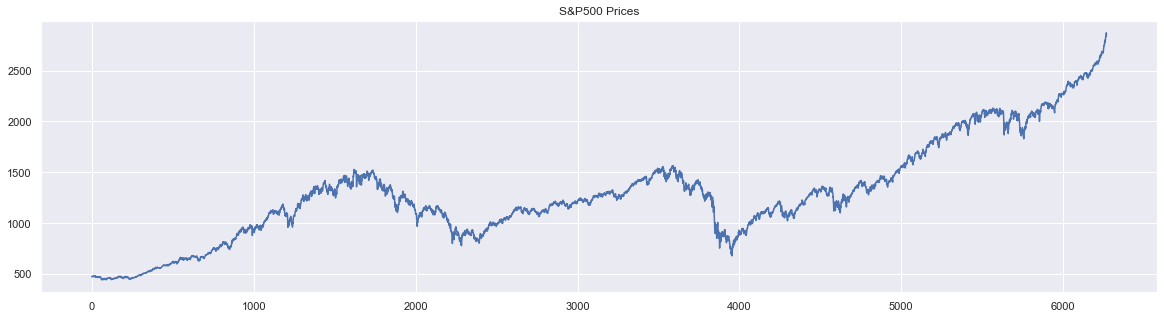

In [337]:
df_comp.spx.plot(figsize=(20,5),title="S&P500 Prices")
plt.show()

* In time series graphs the X axis should depict the time but here it is showing the numerical index only. this problem has to be sorted out for actual insights.

<function matplotlib.pyplot.show(close=None, block=None)>

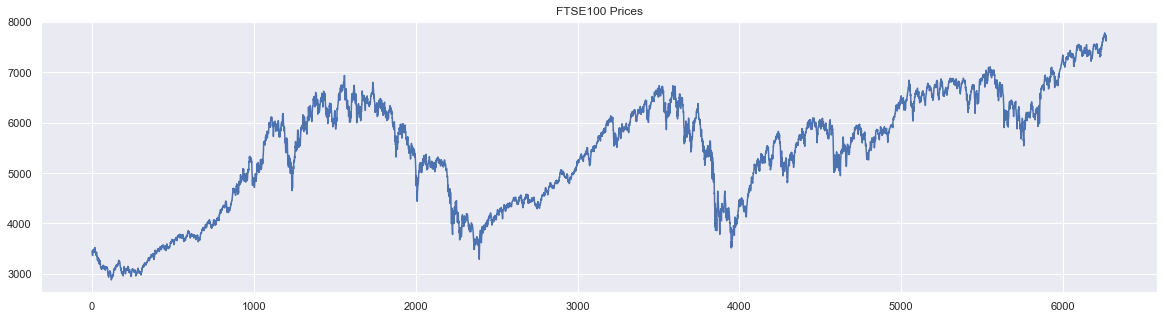

In [338]:
df_comp.ftse.plot(figsize=(20,5),title="FTSE100 Prices")
plt.show

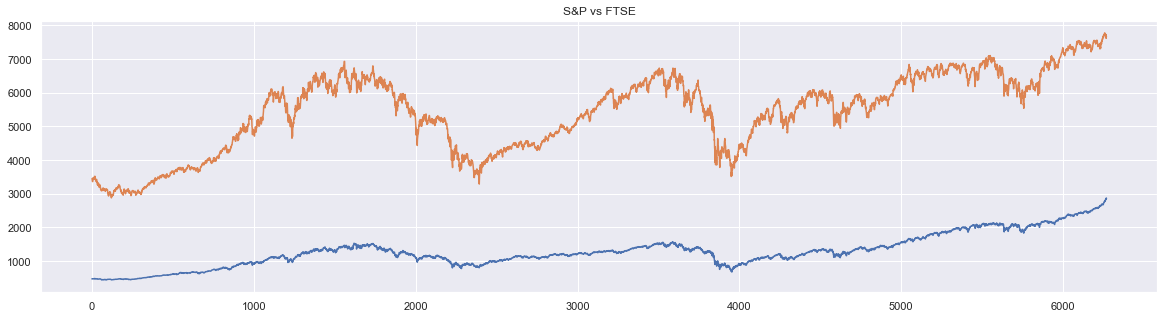

In [339]:
df_comp.spx.plot(figsize=(20,5),title="S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5),title="FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show()

### The QQ Plot (QQ=quantile-quantile)

In [340]:
import scipy.stats
import pylab

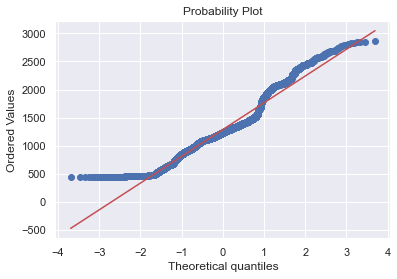

In [341]:
scipy.stats.probplot(df_comp.spx, plot=pylab)
pylab.show()

## Creating a Time Series Object in Python

In [342]:
## importing the packages
## importing the dataset and creating the copy

### Length of the Time Period

In [343]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [344]:
df_comp.date.describe()

count           6269
unique          6269
top       06/06/2000
freq               1
Name: date, dtype: object

### From Text to Date

In [345]:
df_comp.date=pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [346]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

In [347]:
df_comp.set_index("date",inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the Desired Frequency

In [348]:
df_comp=df_comp.asfreq('b')   ## b refers to business days, earlier we used d which refers to daily but included the weekend days which are not required in the analysis

In [349]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling Missing values

In [350]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [351]:
df_comp.spx=df_comp.spx.fillna(method='ffill')

In [352]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [353]:
df_comp.ftse=df_comp.ftse.fillna(method='bfill')

In [354]:
df_comp.dax=df_comp.dax.fillna(value=df_comp.dax.mean())

In [355]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [356]:
df_comp.nikkei=df_comp.nikkei.fillna(value=df_comp.nikkei.mean())

In [357]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the Dataset

In [358]:
df_comp["market_value"]=df_comp["spx"]

In [359]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [360]:
del df_comp['spx']

In [361]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.055700,1288.642547
std,2752.604984,1145.568370,4040.545253,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10711.090000,992.715221
50%,5774.380000,5663.300000,15014.040000,1233.761241
75%,7442.660000,6304.630175,17858.420000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [362]:
del df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [363]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


### Splitting the Data

In [364]:
size=int(len(df_comp)*0.8)
size

5021

In [365]:
df=df_comp.iloc[:size]

In [366]:
df_test=df_comp.iloc[size:]

In [367]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [368]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## Working with Time-Series in Python

### Importing Relevant packages

In [369]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [370]:
### Loading and Transforming the Data
### Removing the Surplus Data

### White Noise

* A time series is white noise if the variables are independent and identically distributed with a mean of zero.
* This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.

* It is important for two main reasons:

* Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
* Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise.

In [371]:
## white noise=wn
## to make the randomly generated white noise data comparable to the S&P data. the mean and standard deviation attributes of white noise data should be similar to S&P data
wn=np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [372]:
df['wn']=wn

In [373]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.174473
std,292.559287,291.759203
min,438.920000,86.126280
25%,914.620000,893.113643
50%,1144.650000,1085.313932
75%,1316.280729,1276.377897
max,1570.252238,2131.200151


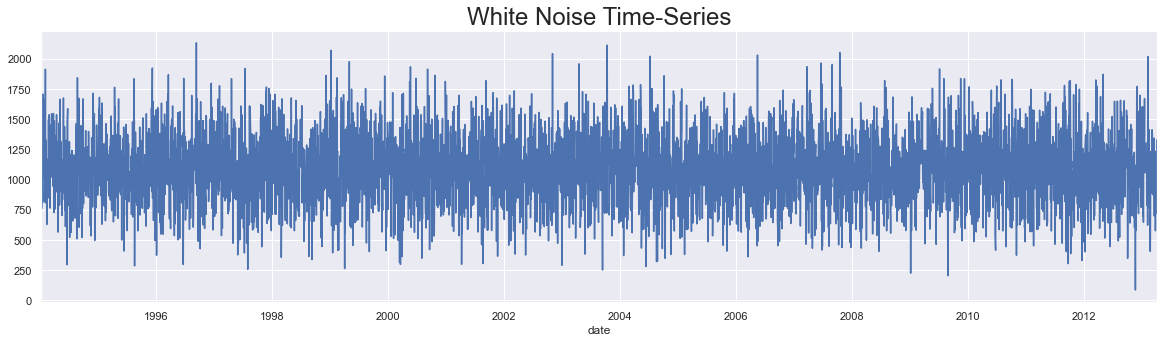

In [374]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size=24)
plt.show()

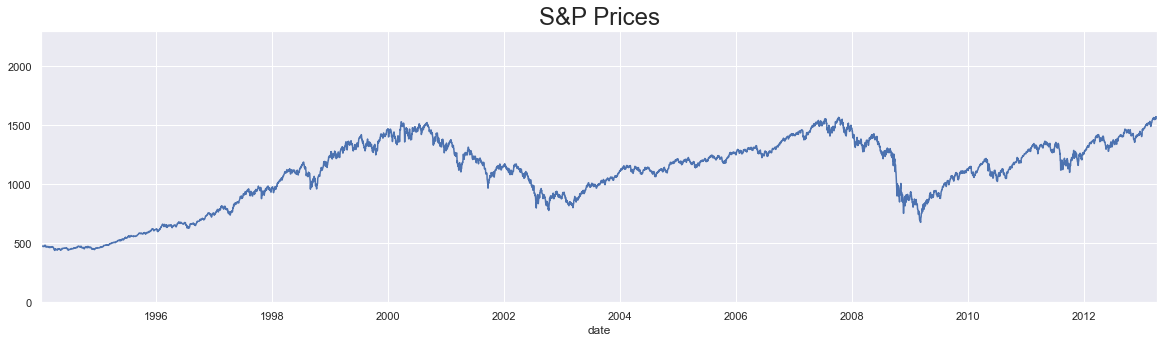

In [375]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices",size=24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [376]:
## random walk=rw
rw=pd.read_csv("RandWalk.csv")
rw.date=pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date",inplace=True)
rw=rw.asfreq('b')

In [377]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [378]:
df['rw']=rw.price
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,925.177462,1122.139662
1994-01-10,475.27,1306.778623,1080.347860
1994-01-11,474.13,760.709723,1082.095245
1994-01-12,474.17,1116.386078,1083.639265
1994-01-13,472.47,1138.931032,1067.146255


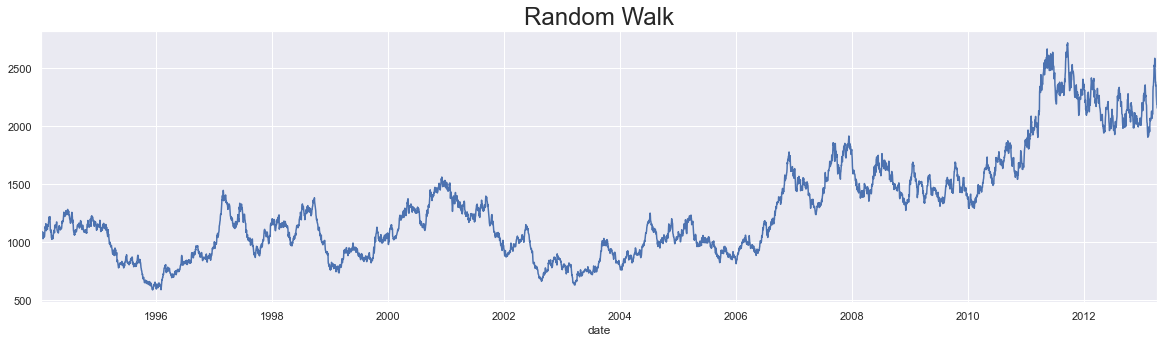

In [379]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk",size=24)
plt.show()

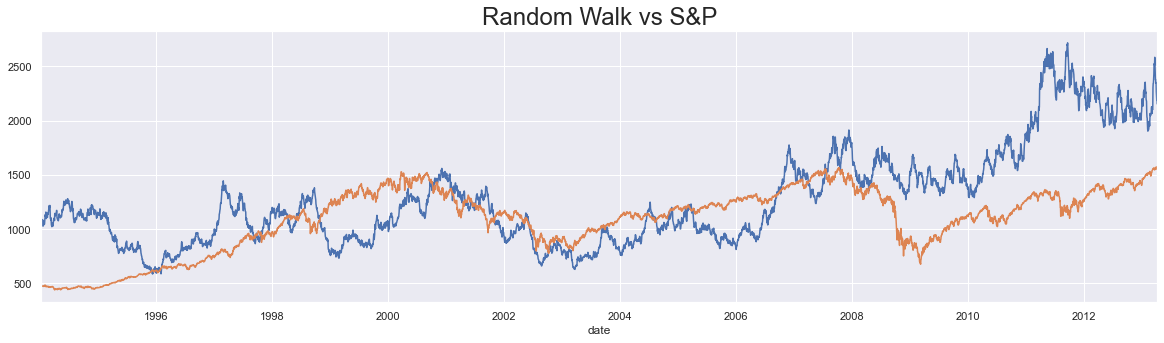

In [380]:
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title("Random Walk vs S&P",size=24)
plt.show()

### Stationarity: For data to be stationary, the statistical properties of a system do not change over time. A stationary time series has a constant variance and it always returns to the long-run mean. A stationary time series will not have trends, seasonality, etc.
* Stationarity= covariance stationarity
* Dickey-Fuller test is used to check if the time-series has stationarity or not

In [381]:
sts.adfuller(df.market_value)

(-1.7369847452352458,
 0.41216456967706105,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [382]:
sts.adfuller(df.wn)

(-32.52704717584027,
 0.0,
 4,
 5016,
 {'1%': -3.431654355990492,
  '5%': -2.862116384706994,
  '10%': -2.5670768102089263},
 70765.25778316693)

In [383]:
sts.adfuller(df.rw)

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

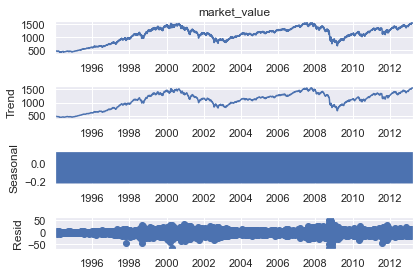

In [384]:
s_dec_add=seasonal_decompose(df.market_value, model='additive')
s_dec_add.plot()
plt.show()

* The additive Naive decomposition method suggests no seasonality in the data

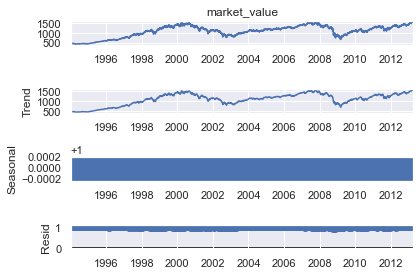

In [385]:
s_dec_mult=seasonal_decompose(df.market_value, model='multiplicative')
s_dec_mult.plot()
plt.show()

* The multiplicative Naive decomposition method suggests no seasonality in the data

### ACF

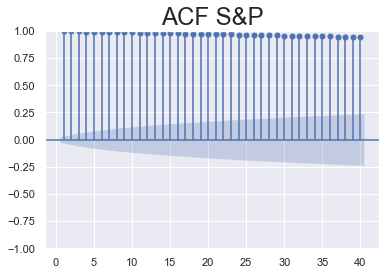

In [386]:
sgt.plot_acf(df.market_value, lags= 40, zero=False)
plt.title("ACF S&P", size=24)
plt.show()

* The correlation values are out of the blue region which shows that there is correlation between the lags and the price values correspoding to lags can be good estimate for the future prediction
* Also there is very slight decrease in the autocorrelation (blue round bullets) which shows persistent correlation in the values

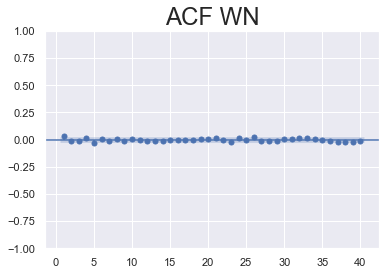

In [387]:
sgt.plot_acf(df.wn, lags= 40, zero=False)
plt.title("ACF WN", size=24)
plt.show()

* As shown in the above graph the autocorrelation values are under the blue area which shows that the assumption for white noise that is, there is no auto-correlation is correct

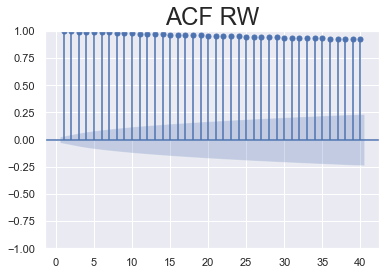

In [388]:
sgt.plot_acf(df.rw, lags= 40, zero=False)
plt.title("ACF RW", size=24)
plt.show()

### PACF

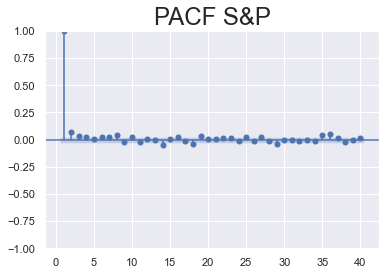

In [389]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('OLS'))
plt.title("PACF S&P", size=24)
plt.show()

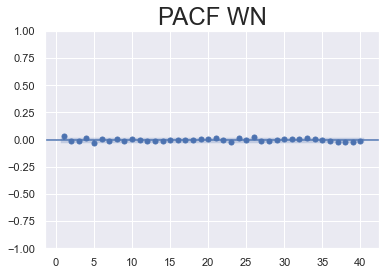

In [390]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('OLS'))
plt.title("PACF WN", size=24)
plt.show()

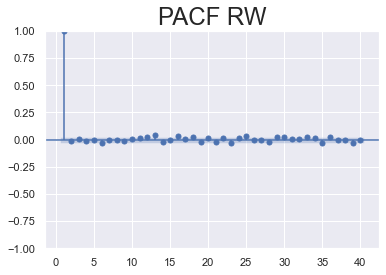

In [391]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('OLS'))
plt.title("PACF RW", size=24)
plt.show()

In [392]:
## ACF and PACF for FTSE prices
df_comp=raw_data.copy()
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='bfill')
df_comp['market_value']=df_comp.ftse

In [393]:
del df_comp['dax'], df_comp['spx'], df_comp['nikkei'], df_comp['ftse']
df_comp

,market_value
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


In [394]:
df=df_comp.iloc[:size]

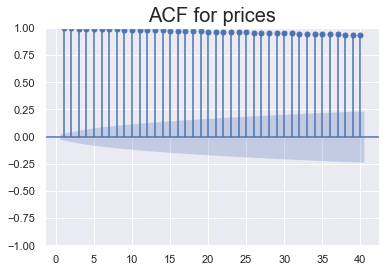

In [395]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF for prices", size=20)
plt.show()

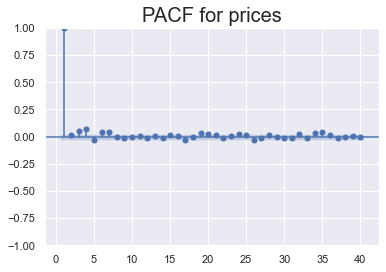

In [396]:
sgt.plot_pacf(df.market_value, zero=False, alpha=0.05, lags=40, method=('ols'))
plt.title("PACF for prices", size=20)
plt.show()

### AR Model for lag=1

In [397]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

In [398]:
model_ar=ARIMA(df.market_value,order=(1,0,0))
results_ar=model_ar.fit()

In [399]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Fri, 03 Dec 2021   AIC                          55251.207
Time:                        07:45:09   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6981    423.328     12.023      0.000    4259.991    5919.405
ar.L1          0.9984      0.001   1147.577      0.000       0.997       1.000
sigma2      3511.3841     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Higher-Lag AR Models

In [400]:
model_ar_2=ARIMA(df.market_value, order=(2,0,0))
results_ar_2=model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.947
Date:                Fri, 03 Dec 2021   AIC                          55251.894
Time:                        07:45:11   BIC                          55277.980
Sample:                    01-07-1994   HQIC                         55261.035
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    368.244     13.822      0.000    4367.956    5811.447
ar.L1          0.9810      0.010     99.872      0.000       0.962       1.000
ar.L2          0.0172      0.010      1.752      0.080      -0.002       0.036
sigma2      3510.1247     41.037     85.536      0.000    3429.694    3590.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.87
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [401]:
model_ar_3=ARIMA(df.market_value, order=(3,0,0))
results_ar_3=model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.741
Date:                Fri, 03 Dec 2021   AIC                          55241.482
Time:                        07:45:13   BIC                          55274.088
Sample:                    01-07-1994   HQIC                         55252.907
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    378.749     13.438      0.000    4347.367    5832.036
ar.L1          0.9802      0.010     99.074      0.000       0.961       1.000
ar.L2         -0.0317      0.013     -2.378      0.017      -0.058      -0.006
ar.L3          0.0498      0.009      5.480      0.000       0.032       0.068
sigma2      3501.9545     41.013     85.387      0.000    3421.571    3582.338
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3288.67
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [402]:
model_ar_4=ARIMA(df.market_value, order=(4,0,0))
results_ar_4=model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27603.491
Date:                Fri, 03 Dec 2021   AIC                          55218.983
Time:                        07:45:15   BIC                          55258.111
Sample:                    01-07-1994   HQIC                         55232.694
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    391.574     12.998      0.000    4322.231    5857.172
ar.L1          0.9767      0.010     97.799      0.000       0.957       0.996
ar.L2         -0.0295      0.013     -2.193      0.028      -0.056      -0.003
ar.L3         -0.0187      0.013     -1.487      0.137      -0.043       0.006
ar.L4          0.0699      0.009      7.708      0.000       0.052       0.088
sigma2      3485.1541     41.937     83.105      0.000    3402.959    3567.349
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3050.21
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Log-Likelihood Test (LLR Test)

In [403]:
## LLR test to find the value of p using chi-square test. DF=Degree of freedom
def LLR_test(mod1,mod2,DF=1):
    L1=mod1.fit().llf
    L2=mod2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR, DF).round(3)
    return p

In [404]:
LLR_test(model_ar_2,model_ar_3)

0.0

In [405]:
LLR_test(model_ar_3,model_ar_4)

0.0

In [406]:
model_ar_4=ARIMA(df.market_value, order=(4,0,0))
results_ar_4=model_ar_4.fit()
print(results_ar_4.summary())
print("LLR test:"+ str(LLR_test(model_ar_3,model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27603.491
Date:                Fri, 03 Dec 2021   AIC                          55218.983
Time:                        07:45:21   BIC                          55258.111
Sample:                    01-07-1994   HQIC                         55232.694
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    391.574     12.998      0.000    4322.231    5857.172
ar.L1          0.9767      0.010     97.799      0.000       0.957       0.996
ar.L2         -0.0295      0.013     -2.193      0.0

In [407]:
model_ar_5=ARIMA(df.market_value, order=(5,0,0))
results_ar_5=model_ar_5.fit()
print(results_ar_5.summary())
print("LLR test:"+ str(LLR_test(model_ar_4,model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27601.545
Date:                Fri, 03 Dec 2021   AIC                          55217.089
Time:                        07:45:25   BIC                          55262.739
Sample:                    01-07-1994   HQIC                         55233.086
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    386.193     13.179      0.000    4332.778    5846.625
ar.L1          0.9786      0.010     97.854      0.000       0.959       0.998
ar.L2         -0.0300      0.013     -2.229      0.0

In [408]:
model_ar_6=ARIMA(df.market_value, order=(6,0,0))
results_ar_6=model_ar_6.fit()
print(results_ar_6.summary())
print("LLR test:"+ str(LLR_test(model_ar_5,model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27597.647
Date:                Fri, 03 Dec 2021   AIC                          55211.293
Time:                        07:45:30   BIC                          55263.464
Sample:                    01-07-1994   HQIC                         55229.574
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    396.928     12.823      0.000    4311.736    5867.667
ar.L1          0.9797      0.010     96.841      0.000       0.960       1.000
ar.L2         -0.0338      0.014     -2.477      0.0

In [409]:
model_ar_7=ARIMA(df.market_value, order=(7,0,0))
results_ar_7=model_ar_7.fit()
print(results_ar_7.summary())
print("LLR test:"+ str(LLR_test(model_ar_6,model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27593.185
Date:                Fri, 03 Dec 2021   AIC                          55204.371
Time:                        07:45:35   BIC                          55263.063
Sample:                    01-07-1994   HQIC                         55224.937
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    405.292     12.558      0.000    4295.343    5884.060
ar.L1          0.9781      0.010     95.711      0.000       0.958       0.998
ar.L2         -0.0311      0.014     -2.230      0.0

In [410]:
model_ar_8=ARIMA(df.market_value, order=(8,0,0))
results_ar_8=model_ar_8.fit()
print(results_ar_8.summary())
print("LLR test:"+ str(LLR_test(model_ar_7,model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27593.040
Date:                Fri, 03 Dec 2021   AIC                          55206.080
Time:                        07:45:41   BIC                          55271.294
Sample:                    01-07-1994   HQIC                         55228.931
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7015    407.243     12.498      0.000    4291.519    5887.884
ar.L1          0.9785      0.010     95.688      0.000       0.958       0.998
ar.L2         -0.0311      0.014     -2.230      0.0

In [411]:
print("LLR test: "+ str(LLR_test(model_ar,model_ar_7, DF=6)))

LLR test: 0.0


### DF test for FTSE

In [412]:
sts.adfuller(df.market_value)

(-1.904935638502626,
 0.32974280493188823,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54856.46568853504)

### Using Returns
* Returns = difference between the consecutive values that shows if there is increase or decrease
* (P(t)-P(t-1)/P(t))*100
* Use of Returns to induce stationarity that is to convert the prices series (market_value) in stationary data.

In [413]:
## value of 1 is the period between the values here
df['returns']=df.market_value.pct_change(1).mul(100)
df=df.iloc[1:]

In [414]:
sts.adfuller(df.returns)

(-12.786930957227375,
 7.213255047801399e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15700.846444346233)

* The value of test statistic that is -12.78 from the dickey fuller test which is very far away less than the 1% significance level, shows that the data comes from a stationary process 

### ACF and PACF for Returns

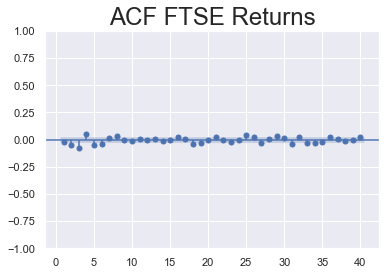

In [415]:
sgt.plot_acf(df.returns,lags=40, zero=False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

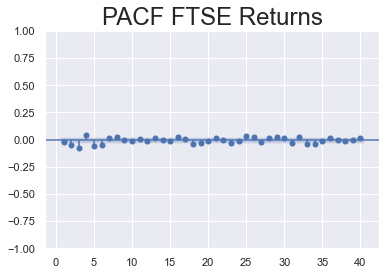

In [416]:
sgt.plot_pacf(df.returns, lags=40, zero=False, method=('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

### AR(1) for Returns

In [417]:
model_ret_ar=ARIMA(df.returns, order=(1,0,0))
results_ret_ar_1=model_ret_ar.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.756
Date:                Fri, 03 Dec 2021   AIC                          15865.512
Time:                        07:45:52   BIC                          15885.076
Sample:                    01-10-1994   HQIC                         15872.368
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.690      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.098      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7873.47
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Higher-Lg AR models for Returns

In [418]:
model_ret_ar_2=ARIMA(df.returns, order=(2,0,0))
results_ret_ar_2=model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.305
Date:                Fri, 03 Dec 2021   AIC                          15854.609
Time:                        07:45:54   BIC                          15880.694
Sample:                    01-10-1994   HQIC                         15863.749
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.232      -0.012       0.050
ar.L1         -0.0241      0.009     -2.794      0.005      -0.041      -0.007
ar.L2         -0.0507      0.008     -6.451      0.000      -0.066      -0.035
sigma2         1.3755      0.014     99.610      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7732.48
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* the p value for L2 is 0 which shows that there is a significant difference from 0 and is important for prediction. also the value of L1 gets decreased so the lower the p value that is less than 0.05 the important is the lag as it has impact on the prediction.

In [419]:
LLR_test(model_ret_ar,model_ret_ar_2,DF=1)

0.0

In [420]:
model_ret_ar_3=ARIMA(df.returns, order=(3,0,0))
results_ret_ar_3=model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7907.795
Date:                Fri, 03 Dec 2021   AIC                          15825.590
Time:                        07:45:58   BIC                          15858.196
Sample:                    01-10-1994   HQIC                         15837.016
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.269      0.205      -0.010       0.048
ar.L1         -0.0281      0.009     -3.184      0.001      -0.045      -0.011
ar.L2         -0.0526      0.008     -6.751      0.000      -0.068      -0.037
ar.L3         -0.0785      0.008     -9.804      0.000      -0.094      -0.063
sigma2         1.3670      0.014     94.523      0.000       1.339       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              6879.49
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [421]:
model_ret_ar_6=ARIMA(df.returns, order=(6,0,0))
results_ret_ar_6=model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7888.633
Date:                Fri, 03 Dec 2021   AIC                          15793.265
Time:                        07:46:00   BIC                          15845.435
Sample:                    01-10-1994   HQIC                         15811.546
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.323      0.186      -0.009       0.047
ar.L1         -0.0248      0.009     -2.672      0.008      -0.043      -0.007
ar.L2         -0.0529      0.008     -6.575      0.000      -0.069      -0.037
ar.L3         -0.0839      0.008    -10.462      0.000      -0.100      -0.068
ar.L4          0.0401      0.008      4.856      0.000       0.024       0.056
ar.L5         -0.0605      0.008     -7.539      0.000      -0.076      -0.045
ar.L6         -0.0464      0.009     -5.198      0.000      -0.064      -0.029
sigma2         1.3566      0.015     92.531      0.000       1.328       1.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6512.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [422]:
LLR_test(model_ret_ar_2,model_ret_ar_3,DF=1)

0.0

### Normalizing values: Normalizing the two series for comparison by taking the percentage change compared to the 1st value of the start of the series

In [423]:
benchmark=df.market_value.iloc[0]

In [424]:
df['norm']=df.market_value.div(benchmark).mul(100)

In [425]:
sts.adfuller(df.norm)

(-1.89365686241222,
 0.33505098158646573,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19556.212836830153)

### Normalizing Returns

In [426]:
bench_ret=df.returns.iloc[0]
df['norm_ret']=df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.78693095722742,
 7.21325504779985e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80118.5703598977)

### Normalized Returns

In [427]:
model_norm_ret_ar_1=ARIMA(df.norm_ret, order=(1,0,0))
results_norm_ret_ar_1=model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40351.751
Date:                Fri, 03 Dec 2021   AIC                          80709.501
Time:                        07:46:05   BIC                          80729.065
Sample:                    01-10-1994   HQIC                         80716.357
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.476     -1.143      0.253     -32.506       8.560
ar.L1         -0.0230      0.009     -2.690      0.007      -0.040      -0.006
sigma2      5.617e+05   5612.608    100.077      0.000    5.51e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7873.42
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [428]:
model_norm_ret_ar_2=ARIMA(df.norm_ret, order=(2,0,0))
results_norm_ret_ar_2=model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -40345.299
Date:                Fri, 03 Dec 2021   AIC                          80698.598
Time:                        07:46:06   BIC                          80724.683
Sample:                    01-10-1994   HQIC                         80707.739
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.044     -1.192      0.233     -31.658       7.712
ar.L1         -0.0241      0.009     -2.791      0.005      -0.041      -0.007
ar.L2         -0.0507      0.008     -6.448      0.000      -0.066      -0.035
sigma2      5.603e+05   5626.818     99.579      0.000    5.49e+05    5.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7732.58
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [429]:
model_norm_ret_ar_7=ARIMA(df.norm_ret, order=(7,0,0))
results_norm_ret_ar_7=model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -40310.358
Date:                Fri, 03 Dec 2021   AIC                          80638.717
Time:                        07:46:09   BIC                          80697.408
Sample:                    01-10-1994   HQIC                         80659.283
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.258     -1.293      0.196     -30.118       6.172
ar.L1         -0.0241      0.009     -2.587      0.010      -0.042      -0.006
ar.L2         -0.0522      0.008     -6.441      0.000      -0.068      -0.036
ar.L3         -0.0845      0.008    -10.352      0.000      -0.101      -0.069
ar.L4          0.0408      0.008      4.882      0.000       0.024       0.057
ar.L5         -0.0600      0.008     -7.435      0.000      -0.076      -0.044
ar.L6         -0.0461      0.009     -5.153      0.000      -0.064      -0.029
ar.L7          0.0104      0.009      1.147      0.251      -0.007       0.028
sigma2      5.528e+05   6026.243     91.734      0.000    5.41e+05    5.65e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6476.06
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* As the AR model values are same for returns in normalized and non-normalized conditions. we can conclude that there is no impact of normalizing on model selection.

### Analysing the Residuals

In [430]:
df['res_price']=results_ar_7.resid

In [431]:
df.res_price.mean()

0.6792598490382058

In [432]:
df.res_price.var()

3469.612760687896

In [433]:
sts.adfuller(df.res_price)

(-70.80088022931909,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54834.47610514785)

### ACF for residuals of Prices

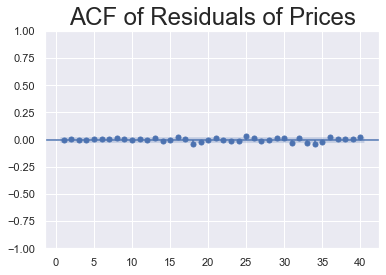

In [434]:
sgt.plot_acf(df.res_price,zero=False,lags=40)
plt.title("ACF of Residuals of Prices",size=24)
plt.show()

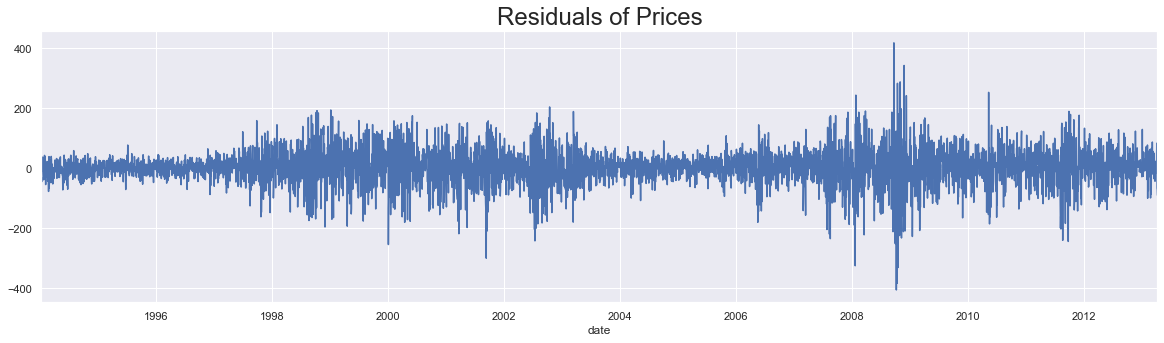

In [435]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices", size=24)
plt.show()

In [436]:
df['res_ret_price']=results_ret_ar_6.resid

In [437]:
df.res_ret_price.mean()

-4.825353642726463e-05

In [438]:
df.res_ret_price.var()

1.3568925966655887

In [439]:
sts.adfuller(df.res_ret_price)

(-70.78594469355363,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15695.929509316575)

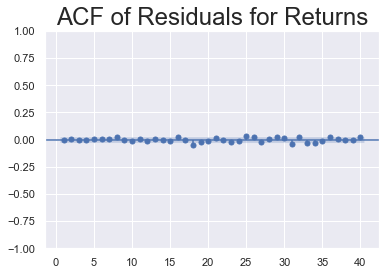

In [440]:
sgt.plot_acf(df.res_ret_price,zero=False,lags=40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

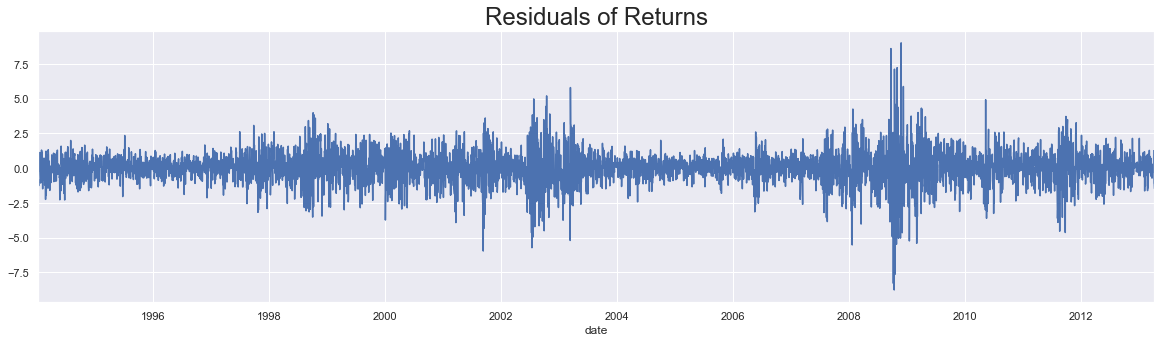

In [441]:
df.res_ret_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

## Moving Averages (MA) model

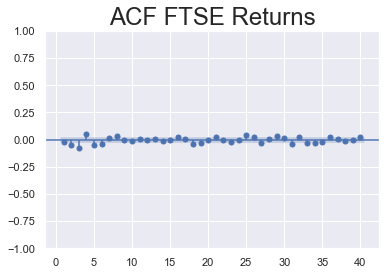

In [442]:
sgt.plot_acf(df.returns,lags=40, zero=False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

## ARMA(1,1)

In [443]:
model_ret_ar_1_ma_1=ARIMA(df.returns[1:],order=(1,0,1))
results_ret_ar_1_ma_1=model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7915.508
Date:                Fri, 03 Dec 2021   AIC                          15839.016
Time:                        07:46:17   BIC                          15865.100
Sample:                    01-11-1994   HQIC                         15848.156
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.291      0.197      -0.010       0.048
ar.L1          0.7658      0.045     17.003      0.000       0.678       0.854
ma.L1         -0.8148      0.040    -20.183      0.000      -0.894      -0.736
sigma2         1.3721      0.014     98.104      0.000       1.345       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):              7485.72
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [444]:
model_ret_ar_1=ARIMA(df.returns[1:],order=(1,0,0))
model_ret_ma_1=ARIMA(df.returns[1:],order=(0,0,1))

In [445]:
print("\nARMA VS AR ", LLR_test(model_ret_ar_1,model_ret_ar_1_ma_1))
print("\nARMA VS MA ", LLR_test(model_ret_ma_1,model_ret_ar_1_ma_1))


ARMA VS AR  0.0

ARMA VS MA  0.0


## Higher-Lag ARMA Models

In [446]:
model_ret_ar_3_ma_3=ARIMA(df.returns[1:],order=(3,0,3))
results_ret_ar_3_ma_3=model_ret_ar_3_ma_3.fit()

In [447]:
LLR_test(model_ret_ar_1_ma_1,model_ret_ar_3_ma_3, DF=4)  # DF= (3+3)-(1+1)=4

0.0

In [448]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7894.008
Date:                Fri, 03 Dec 2021   AIC                          15804.015
Time:                        07:46:48   BIC                          15856.183
Sample:                    01-11-1994   HQIC                         15822.296
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.287      0.198      -0.010       0.048
ar.L1         -0.1711      0.069     -2.482      0.013      -0.306      -0.036
ar.L2         -0.2959      0.054     -5.441      0.000      -0.403      -0.189
ar.L3          0.4577      0.062      7.369      0.000       0.336       0.579
ma.L1          0.1517      0.064      2.362      0.018       0.026       0.278
ma.L2          0.2297      0.052      4.391      0.000       0.127       0.332
ma.L3         -0.5514      0.057     -9.703      0.000      -0.663      -0.440
sigma2         1.3604      0.015     92.624      0.000       1.332       1.389
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              6882.96
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* As per the above model results there are good coeeficients with statistical importance indicated by p-value. Also the LLR test indicates that the ARMA(3,3) model is better than the ARMA(1,1) model. Now we have to find the most well suited and optimized model for the time series which will fall under the ARMA(1,1) or ARMA(3,3).

In [449]:
model_ret_ar_3_ma_2=ARIMA(df.returns[1:],order=(3,0,2))
results_ret_ar_3_ma_2=model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7896.456
Date:                Fri, 03 Dec 2021   AIC                          15806.912
Time:                        07:47:00   BIC                          15852.559
Sample:                    01-11-1994   HQIC                         15822.907
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.016      1.214      0.225      -0.012       0.049
ar.L1         -0.6677      0.056    -11.893      0.000      -0.778      -0.558
ar.L2         -0.5187      0.064     -8.085      0.000      -0.644      -0.393
ar.L3         -0.1108      0.009    -12.310      0.000      -0.128      -0.093
ma.L1          0.6456      0.057     11.354      0.000       0.534       0.757
ma.L2          0.4567      0.065      7.080      0.000       0.330       0.583
sigma2         1.3617      0.015     91.810      0.000       1.333       1.391
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6551.22
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [450]:
model_ret_ar_2_ma_3=ARIMA(df.returns[1:],order=(2,0,3))
results_ret_ar_2_ma_3=model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7896.298
Date:                Fri, 03 Dec 2021   AIC                          15806.596
Time:                        07:47:08   BIC                          15852.243
Sample:                    01-11-1994   HQIC                         15822.592
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.225      0.221      -0.011       0.049
ar.L1         -0.5532      0.058     -9.522      0.000      -0.667      -0.439
ar.L2         -0.4371      0.066     -6.602      0.000      -0.567      -0.307
ma.L1          0.5302      0.058      9.154      0.000       0.417       0.644
ma.L2          0.3719      0.066      5.602      0.000       0.242       0.502
ma.L3         -0.1121      0.009    -12.129      0.000      -0.130      -0.094
sigma2         1.3616      0.015     91.409      0.000       1.332       1.391
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6556.87
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [451]:
LLR_test(model_ret_ar_2_ma_3,model_ret_ar_3_ma_3)

0.032

In [452]:
model_ret_ar_3_ma_1=ARIMA(df.returns[1:],order=(3,0,1))
results_ret_ar_3_ma_1=model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7899.529
Date:                Fri, 03 Dec 2021   AIC                          15811.057
Time:                        07:47:32   BIC                          15850.183
Sample:                    01-11-1994   HQIC                         15824.768
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.249      0.212      -0.011       0.049
ar.L1         -0.5112      0.064     -7.942      0.000      -0.637      -0.385
ar.L2         -0.0645      0.009     -7.082      0.000      -0.082      -0.047
ar.L3         -0.1075      0.008    -13.281      0.000      -0.123      -0.092
ma.L1          0.4871      0.066      7.411      0.000       0.358       0.616
sigma2         1.3634      0.015     92.782      0.000       1.335       1.392
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6511.02
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [453]:
LLR_test(model_ret_ar_3_ma_1,model_ret_ar_3_ma_2)

0.013

In [454]:
model_ret_ar_2_ma_2=ARIMA(df.returns[1:],order=(2,0,2))
results_ret_ar_2_ma_2=model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7913.925
Date:                Fri, 03 Dec 2021   AIC                          15839.849
Time:                        07:47:55   BIC                          15878.975
Sample:                    01-11-1994   HQIC                         15853.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.289      0.197      -0.010       0.048
ar.L1         -0.1033      0.093     -1.112      0.266      -0.285       0.079
ar.L2          0.6995      0.068     10.273      0.000       0.566       0.833
ma.L1          0.0471      0.094      0.503      0.615      -0.137       0.231
ma.L2         -0.7293      0.072    -10.065      0.000      -0.871      -0.587
sigma2         1.3713      0.014     95.063      0.000       1.343       1.400
===================================================================================
Ljung-Box (L1) (Q):                   4.07   Jarque-Bera (JB):              7239.30
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [455]:
LLR_test(model_ret_ar_2_ma_2,model_ret_ar_3_ma_1)

0.0

In [456]:
model_ret_ar_1_ma_3=ARIMA(df.returns[1:],order=(1,0,3))
results_ret_ar_1_ma_3=model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7897.466
Date:                Fri, 03 Dec 2021   AIC                          15806.933
Time:                        07:48:10   BIC                          15846.059
Sample:                    01-11-1994   HQIC                         15820.643
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.267      0.205      -0.010       0.048
ar.L1         -0.4705      0.062     -7.604      0.000      -0.592      -0.349
ma.L1          0.4477      0.062      7.171      0.000       0.325       0.570
ma.L2         -0.0646      0.009     -7.357      0.000      -0.082      -0.047
ma.L3         -0.1150      0.008    -14.307      0.000      -0.131      -0.099
sigma2         1.3622      0.015     92.585      0.000       1.333       1.391
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6427.96
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [457]:
print("ARMA(3,2): LL=",results_ret_ar_3_ma_2.llf,"\tAIC" ,results_ret_ar_3_ma_2.aic)
print("ARMA(1,3): LL=",results_ret_ar_1_ma_3.llf,"\tAIC" ,results_ret_ar_1_ma_3.aic)

ARMA(3,2): LL= -7896.455852287786 	AIC 15806.911704575572
ARMA(1,3): LL= -7897.466292252811 	AIC 15806.932584505623


## Examining the ARMA model residuals

### Residuals for Returns

In [458]:
df['res_ret_ar_3_ma_2']=results_ret_ar_3_ma_2.resid[1:]

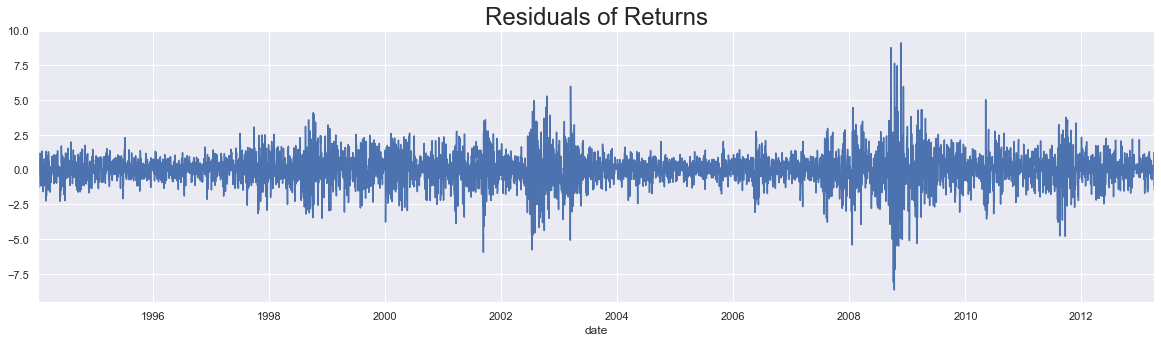

In [459]:
df.res_ret_ar_3_ma_2.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

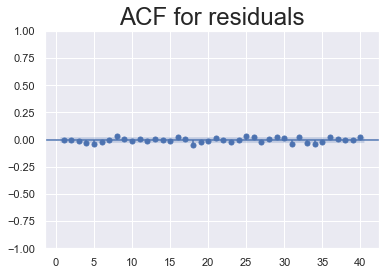

In [460]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:],lags=40, zero=False)
plt.title("ACF for residuals", size=24)
plt.show()

* As per the ACF we are getting a significant lag value for 5th lag so we should check the ARMA(5,5) model or ARMA(5,Q) or ARMA(P,5) for improving the model predictions.

## Reevaluating the Model Selection

In [461]:
model_ret_ar_5_ma_5= ARIMA(df.returns[1:],order=(5,0,5))
results_ret_ar_5_ma_5=model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7882.852
Date:                Fri, 03 Dec 2021   AIC                          15789.705
Time:                        07:48:36   BIC                          15867.957
Sample:                    01-11-1994   HQIC                         15817.126
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0185      0.015      1.255      0.209      -0.010       0.047
ar.L1         -0.0621      0.115     -0.539      0.590      -0.288       0.164
ar.L2         -0.5678      0.081     -7.014      0.000      -0.727      -0.409
ar.L3         -0.1016      0.078     -1.297      0.195      -0.255       0.052
ar.L4          0.2428      0.075      3.253      0.001       0.096       0.389
ar.L5          0.1113      0.092      1.216      0.224      -0.068       0.291
ma.L1          0.0372      0.115      0.324      0.746      -0.188       0.262
ma.L2          0.5182      0.081      6.392      0.000       0.359       0.677
ma.L3          0.0066      0.076      0.087      0.931      -0.142       0.156
ma.L4         -0.2314      0.072     -3.196      0.001      -0.373      -0.089
ma.L5         -0.2040      0.088     -2.331      0.020      -0.375      -0.032
sigma2         1.3536      0.015     90.286      0.000       1.324       1.383
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6416.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [462]:
model_ret_ar_5_ma_1= ARIMA(df.returns[1:],order=(5,0,1))
results_ret_ar_5_ma_1=model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.878
Date:                Fri, 03 Dec 2021   AIC                          15795.755
Time:                        07:48:42   BIC                          15847.923
Sample:                    01-11-1994   HQIC                         15814.036
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.304      0.192      -0.010       0.047
ar.L1          0.3430      0.106      3.234      0.001       0.135       0.551
ar.L2         -0.0462      0.009     -4.890      0.000      -0.065      -0.028
ar.L3         -0.0621      0.010     -6.099      0.000      -0.082      -0.042
ar.L4          0.0707      0.012      5.892      0.000       0.047       0.094
ar.L5         -0.0802      0.009     -9.415      0.000      -0.097      -0.063
ma.L1         -0.3667      0.107     -3.427      0.001      -0.576      -0.157
sigma2         1.3581      0.015     92.277      0.000       1.329       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6488.30
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [463]:
model_ret_ar_1_ma_5= ARIMA(df.returns[1:],order=(1,0,5))
results_ret_ar_1_ma_5=model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7891.623
Date:                Fri, 03 Dec 2021   AIC                          15799.246
Time:                        07:48:47   BIC                          15851.414
Sample:                    01-11-1994   HQIC                         15817.527
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.300      0.193      -0.010       0.048
ar.L1          0.3270      0.133      2.463      0.014       0.067       0.587
ma.L1         -0.3523      0.133     -2.644      0.008      -0.613      -0.091
ma.L2         -0.0410      0.010     -4.181      0.000      -0.060      -0.022
ma.L3         -0.0644      0.011     -5.745      0.000      -0.086      -0.042
ma.L4          0.0705      0.014      4.919      0.000       0.042       0.099
ma.L5         -0.0674      0.009     -7.457      0.000      -0.085      -0.050
sigma2         1.3591      0.015     91.701      0.000       1.330       1.388
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6498.22
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## NOTE
* LLR_test can not be applied for same no. of Degree of Freedom(DF) for ex: ARMA(1,5) and ARMA(5,1) another example: ARMA(2,2) and ARMA(3,1) etc. But these models with same DF can be compared manually by comparing the Log-likelihood and AIC values.

In [464]:
print("ARMA(5,1): LL=",results_ret_ar_5_ma_1.llf,"\tAIC" ,results_ret_ar_5_ma_1.aic)
print("ARMA(1,5): LL=",results_ret_ar_1_ma_5.llf,"\tAIC" ,results_ret_ar_1_ma_5.aic)

ARMA(5,1): LL= -7889.877719329232 	AIC 15795.755438658463
ARMA(1,5): LL= -7891.623114841651 	AIC 15799.246229683302


* Based on the Log-likelihood(LL) and AIC values the model ARMA(5,1) has higher LL value and Lower AIC value than the ARMA(1,5) so ARMA(5,1) is much better model.

In [465]:
print("ARMA(5,1): LL=",results_ret_ar_5_ma_1.llf,"\tAIC" ,results_ret_ar_5_ma_1.aic)
print("ARMA(3,2): LL=",results_ret_ar_3_ma_2.llf,"\tAIC" ,results_ret_ar_3_ma_2.aic)

ARMA(5,1): LL= -7889.877719329232 	AIC 15795.755438658463
ARMA(3,2): LL= -7896.455852287786 	AIC 15806.911704575572


* Based on the Log-likelihood(LL) and AIC values the model ARMA(5,1) has higher LL value and Lower AIC value than the ARMA(3,2) so ARMA(5,1) is the best model.

### Residuals for the New Model

In [466]:
df['res_ret_ar_5_ma_1']=results_ret_ar_5_ma_1.resid

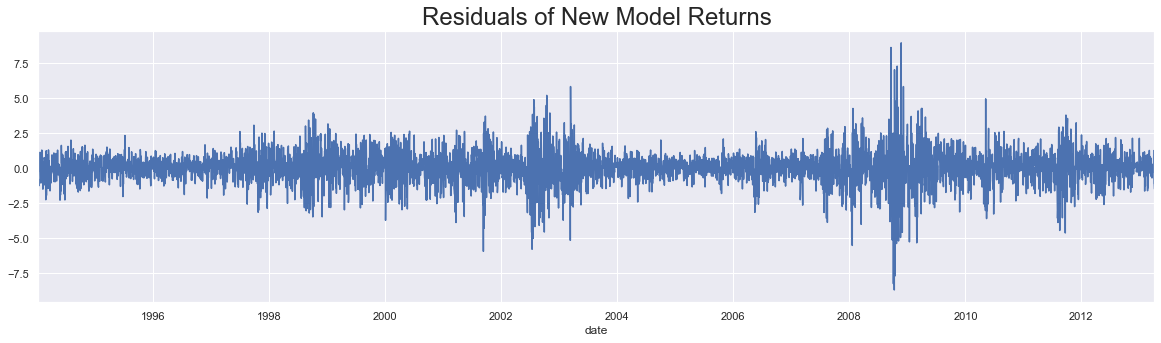

In [467]:
df.res_ret_ar_5_ma_1.plot(figsize=(20,5))
plt.title("Residuals of New Model Returns", size=24)
plt.show()

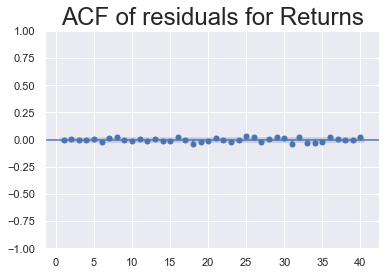

In [468]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:],lags=40, zero=False)
plt.title("ACF of residuals for Returns", size=24)
plt.show()

* As residuals of more than 10 lags are not significant we can say that the residuals are random and match with white noise, that is what we require because residuals should not have any trend or pattern invovled otherwise, if We saw a pattern in the residuals, it means there is a factor we hadn’t accounted for in our regression and we have to rethink about the model and work on finding more optimized model.

## ARMA Models for Prices

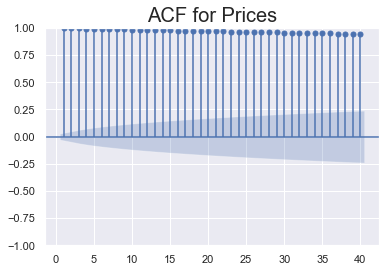

In [469]:
sgt.plot_acf(df.market_value, unbiased=True, zero=False, lags=40)
plt.title("ACF for Prices", size=20)
plt.show()

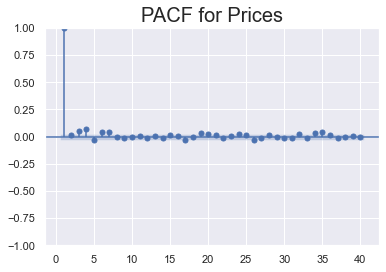

In [470]:
sgt.plot_pacf(df.market_value, lags=40, alpha=0.05, zero= False, method=('ols'))
plt.title("PACF for Prices", size=20)
plt.show()

In [471]:
model_ar_1_ma_1= ARIMA(df.market_value, order=(1,0,1))
results_ar_1_ma_1=model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27616.877
Date:                Fri, 03 Dec 2021   AIC                          55241.754
Time:                        07:48:51   BIC                          55267.838
Sample:                    01-10-1994   HQIC                         55250.894
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5090.0289    363.322     14.010      0.000    4377.931    5802.127
ar.L1          0.9982      0.001   1191.642      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.899      0.058      -0.038       0.001
sigma2      3511.4783     41.083     85.474      0.000    3430.958    3591.999
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3277.28
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [472]:
df['res_ar_1_ma_1']=results_ar_1_ma_1.resid

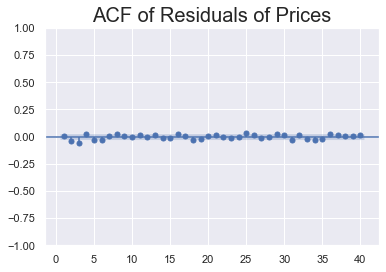

In [473]:
sgt.plot_acf(df.res_ar_1_ma_1, zero=False, lags=40)
plt.title("ACF of Residuals of Prices", size=20)
plt.show()

In [474]:
model_ar_6_ma_6= ARIMA(df.market_value, order=(6,0,6))
results_ar_6_ma_6=model_ar_6_ma_6.fit()#start_ar_lags=11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27587.436
Date:                Fri, 03 Dec 2021   AIC                          55202.873
Time:                        07:49:09   BIC                          55294.169
Sample:                    01-10-1994   HQIC                         55234.864
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5090.0288    503.778     10.104      0.000    4102.643    6077.415
ar.L1          0.7427      1.904      0.390      0.696      -2.989       4.474
ar.L2          0.2131      3.164      0.067      0.946      -5.987       6.414
ar.L3         -0.3492      2.469     -0.141      0.887      -5.188       4.489
ar.L4          0.3371      1.572      0.214      0.830      -2.745       3.419
ar.L5         -0.1305      0.815     -0.160      0.873      -1.728       1.467
ar.L6          0.1848      0.451      0.410      0.682      -0.699       1.068
ma.L1          0.2359      1.904      0.124      0.901      -3.495       3.967
ma.L2         -0.0127      1.311     -0.010      0.992      -2.583       2.557
ma.L3          0.3070      1.139      0.270      0.787      -1.925       2.539
ma.L4          0.0557      0.477      0.117      0.907      -0.878       0.990
ma.L5          0.1392      0.542      0.257      0.797      -0.922       1.201
ma.L6         -0.0809      0.168     -0.482      0.630      -0.410       0.248
sigma2      3465.0004     43.208     80.194      0.000    3380.314    3549.687
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2972.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [475]:
model_ar_5_ma_6= ARIMA(df.market_value, order=(5,0,6))
results_ar_5_ma_6=model_ar_5_ma_6.fit()#start_ar_lags=7)
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -27585.532
Date:                Fri, 03 Dec 2021   AIC                          55197.064
Time:                        07:49:35   BIC                          55281.840
Sample:                    01-10-1994   HQIC                         55226.771
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5090.0288   1413.699      3.601      0.000    2319.230    7860.828
ar.L1          0.6577      0.519      1.267      0.205      -0.360       1.675
ar.L2         -0.2440      0.613     -0.398      0.690      -1.445       0.957
ar.L3          0.1198      0.536      0.223      0.823      -0.931       1.171
ar.L4          0.6099      0.431      1.416      0.157      -0.234       1.454
ar.L5         -0.1443      0.102     -1.417      0.157      -0.344       0.055
ma.L1          0.3196      0.518      0.617      0.537      -0.696       1.335
ma.L2          0.5292      0.148      3.585      0.000       0.240       0.819
ma.L3          0.3632      0.417      0.872      0.383      -0.454       1.180
ma.L4         -0.1868      0.100     -1.872      0.061      -0.382       0.009
ma.L5         -0.0875      0.012     -7.100      0.000      -0.112      -0.063
ma.L6         -0.0532      0.051     -1.034      0.301      -0.154       0.048
sigma2      3469.1392     42.280     82.051      0.000    3386.272    3552.007
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3049.55
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [476]:
model_ar_6_ma_1= ARIMA(df.market_value, order=(6,0,1))
results_ar_6_ma_1=model_ar_6_ma_1.fit()#start_ar_lags=7)
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -27590.290
Date:                Fri, 03 Dec 2021   AIC                          55198.579
Time:                        07:49:52   BIC                          55257.270
Sample:                    01-10-1994   HQIC                         55219.145
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5090.0188    526.476      9.668      0.000    4058.145    6121.892
ar.L1          1.3895      0.158      8.791      0.000       1.080       1.699
ar.L2         -0.4350      0.154     -2.822      0.005      -0.737      -0.133
ar.L3         -0.0063      0.017     -0.378      0.705      -0.039       0.026
ar.L4          0.1064      0.016      6.560      0.000       0.075       0.138
ar.L5         -0.1117      0.020     -5.640      0.000      -0.151      -0.073
ar.L6          0.0565      0.009      6.140      0.000       0.038       0.075
ma.L1         -0.4103      0.159     -2.588      0.010      -0.721      -0.100
sigma2      3474.1949     42.159     82.407      0.000    3391.565    3556.825
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3038.33
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [477]:
print("ARMA(5,6): LL=",results_ar_5_ma_6.llf,"\tAIC" ,results_ar_5_ma_6.aic)
print("ARMA(6,1): LL=",results_ar_6_ma_1.llf,"\tAIC" ,results_ar_6_ma_1.aic)

ARMA(5,6): LL= -27585.532187094985 	AIC 55197.06437418997
ARMA(6,1): LL= -27590.289733265454 	AIC 55198.57946653091


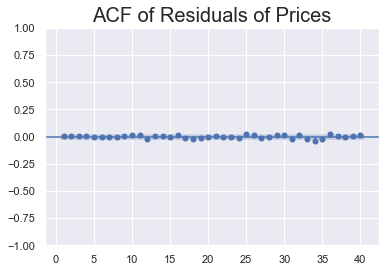

In [478]:
df['res_ar_5_ma_6']=results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero=False, lags=40)
plt.title("ACF of Residuals of Prices", size=20)
plt.show()

## ARMA for Returns vs ARMA for Prices

In [479]:
print("ARMA(5,6): LL=",results_ar_5_ma_6.llf,"\tAIC" ,results_ar_5_ma_6.aic)
print("ARMA(5,1): LL=",results_ret_ar_5_ma_1.llf,"\tAIC" ,results_ret_ar_5_ma_1.aic)

ARMA(5,6): LL= -27585.532187094985 	AIC 55197.06437418997
ARMA(5,1): LL= -7889.877719329232 	AIC 15795.755438658463


### Importing a new Package for ARIMA

In [480]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

## ARIMA(1,1,1)

In [481]:
df_comp=raw_data.copy()
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='bfill')
df_comp['market_value']=df_comp.ftse
del df_comp['dax'], df_comp['spx'], df_comp['nikkei'], df_comp['ftse']
df_comp
df, df_test=df_comp.iloc[:size], df_comp.iloc[size:]

In [482]:
model_arima_111= ARIMA(df.market_value, order=(1,1,1))
results_arima_111=model_arima_111.fit()
results_arima_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.051
Date:                Fri, 03 Dec 2021   AIC                          55214.102
Time:                        07:49:57   BIC                          55233.666
Sample:                    01-07-1994   HQIC                         55220.958
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7460      0.059     12.638      0.000       0.630       0.862
ma.L1         -0.7919      0.053    -14.899      0.000      -0.896      -0.688
sigma2      3497.2506     40.894     85.521      0.000    3417.101    3577.401
===================================================================================
Ljung-Box (L1) (Q):                   2.60   Jarque-Bera (JB):              3326.24
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Residuals of the ARIMA(1,1,1)

In [483]:
df['res_arima_111']=results_arima_111.resid

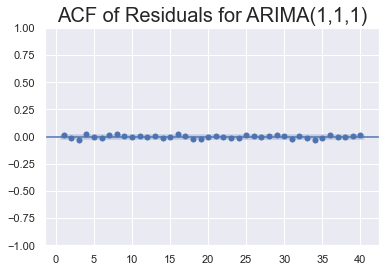

In [484]:
sgt.plot_acf(df.res_arima_111, zero=False, lags=40)
plt.title("ACF of Residuals for ARIMA(1,1,1)", size=20)
plt.show()

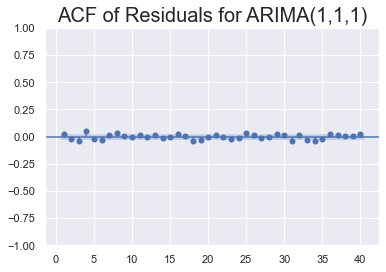

In [485]:
sgt.plot_acf(df.res_arima_111[1:], zero=False, lags=40)
plt.title("ACF of Residuals for ARIMA(1,1,1)", size=20)
plt.show()

* As per the ACF the 3rd and 4th lag are signiifcant and different from 0 value so we can say that the better RIMA model lie between the ARIMA(1,1,1) and ARIMA(4,1,4). And we need to check the most well suited and optimized model in the range we mentioned.

### Higher-Lag ARIMA Models

In [486]:
model_arima_112=ARIMA(df.market_value,order=(1,1,2))
results_arima_112=model_arima_112.fit()
model_arima_113=ARIMA(df.market_value,order=(1,1,3))
results_arima_113=model_arima_113.fit()
model_arima_211=ARIMA(df.market_value,order=(2,1,1))
results_arima_211=model_arima_211.fit()
model_arima_311=ARIMA(df.market_value,order=(3,1,1))
results_arima_311=model_arima_311.fit()
model_arima_312=ARIMA(df.market_value,order=(3,1,2))
results_arima_312=model_arima_312.fit()#start_ar_lags=5)

In [487]:
print("ARIMA(1,1,1): LL=",results_arima_111.llf,"\tAIC" ,results_arima_111.aic)
print("ARIMA(1,1,2): LL=",results_arima_112.llf,"\tAIC" ,results_arima_112.aic)
print("ARIMA(1,1,3): LL=",results_arima_113.llf,"\tAIC" ,results_arima_113.aic)
print("ARIMA(2,1,1): LL=",results_arima_211.llf,"\tAIC" ,results_arima_211.aic)
print("ARIMA(3,1,1): LL=",results_arima_311.llf,"\tAIC" ,results_arima_311.aic)
print("ARIMA(3,1,2): LL=",results_arima_312.llf,"\tAIC" ,results_arima_312.aic)

ARIMA(1,1,1): LL= -27604.051173550368 	AIC 55214.102347100736
ARIMA(1,1,2): LL= -27600.470337995277 	AIC 55208.940675990554
ARIMA(1,1,3): LL= -27591.904204380957 	AIC 55193.80840876191
ARIMA(2,1,1): LL= -27600.197766077777 	AIC 55208.395532155555
ARIMA(3,1,1): LL= -27593.416365990422 	AIC 55196.832731980845
ARIMA(3,1,2): LL= -27592.178989311826 	AIC 55196.35797862365


* As the value of LL is more and AIC is less for ARIMA(1,1,3) it seems to be the best model, but as ARIMA(1,1,1) and ARIMA(1,1,2) are nested we need to check which model among 3 is best, using LLR test.

In [488]:
print("\nLLR test p-value = " + str(LLR_test(model_arima_112,model_arima_113)))


LLR test p-value = 0.0


In [489]:
print("\nLLR test p-value = " + str(LLR_test(model_arima_111,model_arima_113,DF=2)))


LLR test p-value = 0.0


* As the values of LLR test for ARIMA(1,1,2) & ARIMA(1,1,3) and for ARIMA(1,1,1) & ARIMA(1,1,3) is 0 so it tells that ARIMA(1,1,3) is the best model.

In [490]:
df['res_arima_113']=results_arima_113.resid.iloc[:]

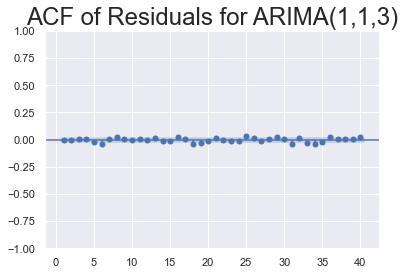

In [491]:
sgt.plot_acf(df.res_arima_113[1:],zero=False,lags=40)
plt.title("ACF of Residuals for ARIMA(1,1,3)",size=24)
plt.show()

* Looking at the ACF we have a Lag with high significant value than 0 that is the 6th Lag. It shows that we need to consider the Lag value in our model to leave a residual equal to white noise, therefore we need to assess the ARIMA model with AR value till 6th Lag.

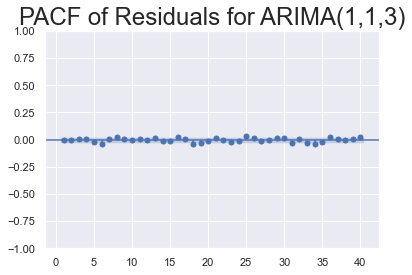

In [492]:
sgt.plot_pacf(df.res_arima_113[1:], alpha=0.05, zero= False, method=('ols'), lags=40)
plt.title("PACF of Residuals for ARIMA(1,1,3)",size=24)
plt.show()

In [493]:
model_arima_613=ARIMA(df.market_value,order=(6,1,3))
results_arima_613=model_arima_613.fit()
model_arima_511=ARIMA(df.market_value,order=(5,1,1))
results_arima_511=model_arima_511.fit()

In [494]:
print("ARIMA(6,1,3): LL=",results_arima_613.llf,"\tAIC" ,results_arima_613.aic)
print("ARIMA(5,1,1): LL=",results_arima_511.llf,"\tAIC" ,results_arima_511.aic)
print("ARIMA(1,1,3): LL=",results_arima_113.llf,"\tAIC" ,results_arima_113.aic)

ARIMA(6,1,3): LL= -27584.892799450867 	AIC 55189.78559890173
ARIMA(5,1,1): LL= -27587.943443519776 	AIC 55189.88688703955
ARIMA(1,1,3): LL= -27591.904204380957 	AIC 55193.80840876191


* As per the LL and AIC values, ARIMA(6,1,3) model looks to be the best model but as the other 2 models are nested we have to check which model is best and the complexity is worth it,using the LLR test.

In [495]:
print("\nLLR test p-value = " + str(LLR_test(model_arima_113,model_arima_613,DF=5)))


LLR test p-value = 0.015


In [496]:
print("\nLLR test p-value = " + str(LLR_test(model_arima_511,model_arima_613,DF=3)))


LLR test p-value = 0.107


## Note:
* As per the course tutorial the LLR test p-value for ARIMA(5,1,1) & ARIMA(6,1,3) is 0.117 which shows that ARIMA(6,1,3) model is not better than the comparatively simple ARIMA(5,1,1) model therefore we will consider the ARIMA(5,1,1) as the best model now.

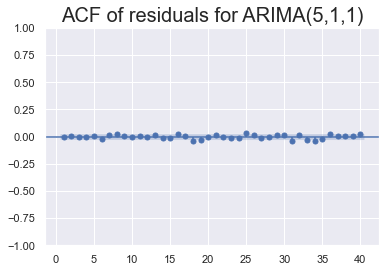

In [497]:
## checking for residuals of ARIMA(5,1,1) if it matches with white noise or not
df['res_arima_511']=results_arima_511.resid
sgt.plot_acf(df.res_arima_511[2:], zero=False,lags=40)
plt.title("ACF of residuals for ARIMA(5,1,1)",size=20)
plt.show()

* The ACF graph shows that first 15 Lags do not have any significant coefficients so we can say that the residuals are similar to whilte noise. Although there are some lags like 18th, 25th, 31st, 33rd and 34th but we can not consider them in the model as the more far we go in the Lags the more redundant the values become for prediction so we will consider the top 15 lags only right now.

### Models with Higher Degree Integration

In [498]:
df['delta_prices']=df.market_value.diff(1)

In [499]:
model_arima_delta_111=ARIMA(df.delta_prices[1:], order=(1,0,1))
results_arima_delta_111=model_arima_delta_111.fit()
results_arima_delta_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.713
Date:                Fri, 03 Dec 2021   AIC                          55215.426
Time:                        07:50:48   BIC                          55241.511
Sample:                    01-10-1994   HQIC                         55224.566
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5641      0.753      0.749      0.454      -0.912       2.040
ar.L1          0.7478      0.059     12.664      0.000       0.632       0.864
ma.L1         -0.7938      0.053    -14.856      0.000      -0.899      -0.689
sigma2      3497.1083     41.199     84.884      0.000    3416.360    3577.856
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):              3327.49
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [500]:
sts.adfuller(df.delta_prices[1:])

(-32.23677977272846,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54848.27618859298)

* As the Statistic value -32.23 is less than critical value for 99% confidence level that is -3.43. And the p-value is also less than 0.05 which shows that the series is stationary.

## ARIMAX

In [501]:
df_comp=raw_data.copy()
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='bfill')
df_comp['market_value']=df_comp.ftse
del df_comp['dax'], df_comp['nikkei'], df_comp['ftse']
df_comp
df, df_test=df_comp.iloc[:size], df_comp.iloc[size:]

In [502]:
model_arima_111_Xspx=ARIMA(df.market_value, exog=df.spx, order=(1,1,1))
results_arima_111_Xspx=model_arima_111_Xspx.fit()
results_arima_111_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.244
Date:                Fri, 03 Dec 2021   AIC                          53394.488
Time:                        07:50:53   BIC                          53420.573
Sample:                    01-07-1994   HQIC                         53403.629
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6927      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2548      0.029      8.723      0.000       0.198       0.312
ma.L1         -0.5439      0.025    -21.662      0.000      -0.593      -0.495
sigma2      2432.9665     27.346     88.970      0.000    2379.369    2486.564
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.74
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX

In [503]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [504]:
model_sarimax=SARIMAX(df.market_value, exog=df.spx, order=(1,0,1),seasonal_order=(2,0,1,5))
results_sarimax=model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26711.513
Date:                           Fri, 03 Dec 2021   AIC                          53437.027
Time:                                   07:51:15   BIC                          53482.676
Sample:                               01-07-1994   HQIC                         53453.023
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7044      0.035     76.360      0.000       2.635       2.774
ar.L1          0.9997      0.001   1859.032      0.000       0.999       1.001
ma.L1         -0.3101      0.010    -32.438      0.000      -0.329      -0.291
ar.S.L5        0.9651      0.013     76.522      0.000       0.940       0.990
ar.S.L10       0.0343      0.010      3.306      0.001       0.014       0.055
ma.S.L5       -0.9989      0.008   -122.761      0.000      -1.015      -0.983
sigma2      2442.5849     28.918     84.466      0.000    2385.907    2499.263
===================================================================================
Ljung-Box (L1) (Q):                   1.56   Jarque-Bera (JB):              4193.70
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Creating Returns

In [505]:
df['returns']=df.market_value.pct_change(1)*100

### Creating squared Returns

In [506]:
df['sq_returns']=df.returns.mul(df.returns)

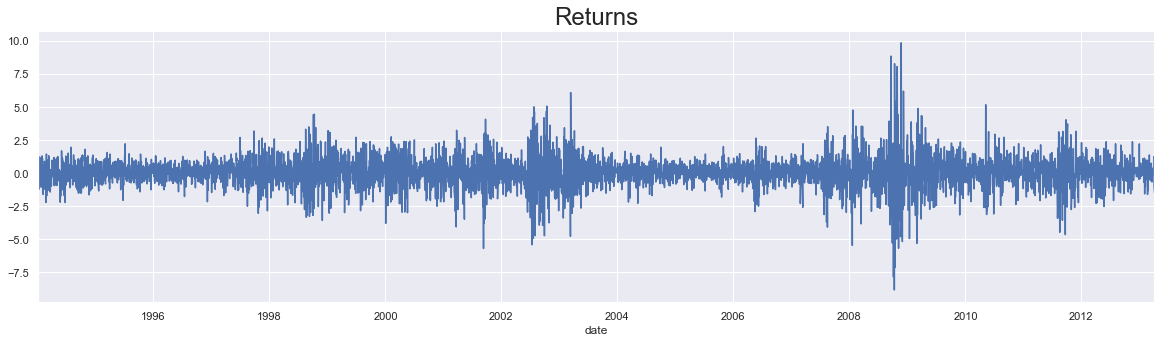

In [507]:
df.returns.plot(figsize=(20,5))
plt.title("Returns",size=24)
plt.show()

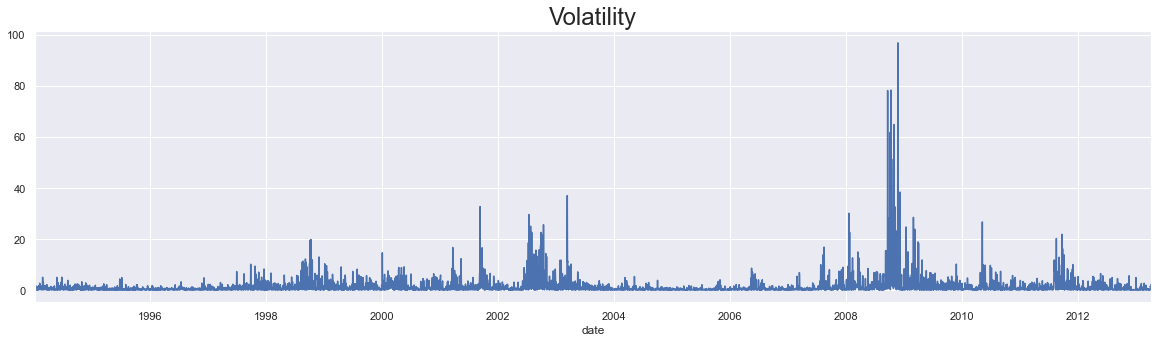

In [508]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility",size=24)
plt.show()

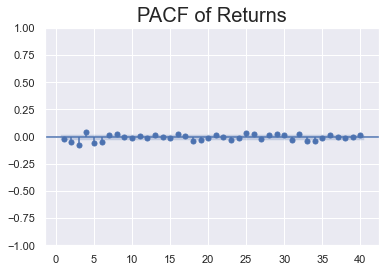

In [509]:
sgt.plot_pacf(df.returns[1:],lags=40,alpha=0.05, zero=False,method=('ols'))
plt.title("PACF of Returns",size=20)
plt.show()

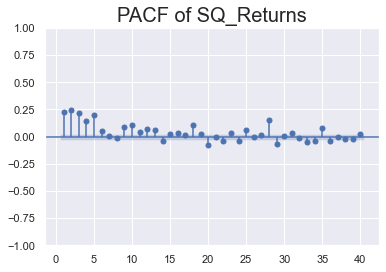

In [510]:
sgt.plot_pacf(df.sq_returns[1:],lags=40,alpha=0.05, zero=False,method=('ols'))
plt.title("PACF of SQ_Returns",size=20)
plt.show()

## Volatility and ARCH/GARCH Models
* There are some time series where the variance changes consistently over time. In the context of a time series in the financial domain, this would be called increasing and decreasing volatility.
* In time series where the variance is increasing in a systematic way, such as an increasing trend, this property of the series is called heteroskedasticity. It’s a fancy word from statistics that means changing or unequal variance across the series.
* If the change in variance can be correlated over time, then it can be modeled using an autoregressive process, such as ARCH.
* The approach expects the series is stationary, other than the change in variance, meaning it does not have a trend or seasonal component. An ARCH model is used to predict the variance at future time steps.

* Generalized Autoregressive Conditional Heteroskedasticity, or GARCH, is an extension of the ARCH model that incorporates a moving average component together with the autoregressive component.
* Specifically, the model includes lag variance terms (e.g. the observations if modeling the white noise residual errors of another process), together with lag residual errors from a mean process.
* The introduction of a moving average component allows the model to both model the conditional change in variance over time as well as changes in the time-dependent variance. Examples include conditional increases and decreases in variance.
** p: The number of lag variances to include in the GARCH model.
** q: The number of lag residual errors to include in the GARCH model.

Note:
* As with ARCH, GARCH predicts the future variance and expects that the series is stationary (other than the change in variance) meaning it does not have a trend or seasonal component.

## The ARCH_model() Method

In [511]:
from arch import arch_model

In [512]:
model_arch_1=arch_model(df.returns[1:])
results_arch_1=model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 169566670380672.97
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2700794207.3567657
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7008.5167974778415
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7023.052470808224
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.310508812574
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.163507908772
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7117.006577414568
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.721816095447
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6969.917502984883
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6969.891799324589
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6969.891700336309
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6969.8916986339655
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6969.891698633552
Optimization terminated successfully    (Exit mode 0)
      

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6969.89
Distribution:                  Normal   AIC:                           13947.8
Method:            Maximum Likelihood   BIC:                           13973.9
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:20   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.193e-05 [2.340e-02,6.975e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.989e-03      3.641  2.720e-04 [5.023e-03,1.674e-02]
alpha[1]       0.0836  1.071e-02      7.808  5.826e-15   [6.263e-02,  0.105]
beta[1]        0.9088  1.148e-02     79.151      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

### The Simple Arch(1)

In [513]:
model_arch_1=arch_model(df.returns[1:], mean='Constant',vol='ARCH',p=1)
results_arch_1=model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 7658.91084489258
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7658.91084489258
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7658.91
Distribution:                  Normal   AIC:                           15323.8
Method:            Maximum Likelihood   BIC:                           15343.4
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:20   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0342  1.602e-02      2.137  3.257e-02 [2.842e-03,6.564e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9181  4.316e-02     21.272 2.076e-100 [  0.834,  1.003]
alpha[1]       0.3713  5.082e-02      7.307  2.728e-13 [  0.272,  0.471]
========================================================================

Covariance estimator: robust
"""

In [514]:
model_arch_1=arch_model(df.returns[1:], mean='zero',vol='ARCH',p=1,lags=[2,3,4,5], dist='ged')
results_arch_1=model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     26,   Neg. LLF: 7339.74830658587
Iteration:     10,   Func. Count:     48,   Neg. LLF: 7336.300328867548
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7336.300323159802
            Iterations: 12
            Function evaluations: 55
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Zero Mean - ARCH Model Results                              
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.000
Mean Model:                             Zero Mean   Adj. R-squared:                  0.000
Vol Model:                                   ARCH   Log-Likelihood:               -7336.30
Distribution:      Generalized Error Distribution   AIC:                           14678.6
Method:                        Maximum Likelihood   BIC:                           14698.2
                                                    No. Observations:                 5020
Date:                            Fri, Dec 03 2021   Df Residuals:                     5020
Time:                                    07:51:20   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9245  3.811e-02     24.261 5.121e-130 [  0.850,  0.999]
alpha[1]       0.3480  3.932e-02      8.850  8.717e-19 [  0.271,  0.425]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0512  3.427e-02     30.675 1.224e-206 [  0.984,  1.118]
========================================================================

Covariance estimator: robust
"""

### Higher-Lag ARCH Models

In [515]:
model_arch_2=arch_model(df.returns[1:],mean='Constant', vol='ARCH',p=2)
results_arch_2=model_arch_2.fit()
results_arch_2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 34374.543975413646
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11356.98665767889
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7915.095639559751
Iteration:      4,   Func. Count:     31,   Neg. LLF: 7650.720877911061
Iteration:      5,   Func. Count:     37,   Neg. LLF: 8582.381993961148
Iteration:      6,   Func. Count:     44,   Neg. LLF: 7448.277795742479
Iteration:      7,   Func. Count:     49,   Neg. LLF: 7448.2723278447875
Iteration:      8,   Func. Count:     54,   Neg. LLF: 7448.272282637893
Iteration:      9,   Func. Count:     58,   Neg. LLF: 7448.272282637588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7448.272282637893
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7448.27
Distribution:                  Normal   AIC:                           14904.5
Method:            Maximum Likelihood   BIC:                           14930.6
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:20   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0485  1.400e-02      3.466  5.275e-04 [2.109e-02,7.597e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6961  3.564e-02     19.530  6.055e-85 [  0.626,  0.766]
alpha[1]       0.2219  3.498e-02      6.342  2.272e-10 [  0.153,  0.290]
alpha[2]       0.2784  3.639e-02      7.650  2.014e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

In [516]:
model_arch_3=arch_model(df.returns[1:],mean='Constant', vol='ARCH',p=3)
results_arch_3=model_arch_3.fit()
results_arch_3.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 39551.303433486915
Iteration:      2,   Func. Count:     18,   Neg. LLF: 11950.452819219912
Iteration:      3,   Func. Count:     27,   Neg. LLF: 8315.75497678498
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7496.135356252249
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7682.149657502917
Iteration:      6,   Func. Count:     48,   Neg. LLF: 7391.574105597163
Iteration:      7,   Func. Count:     56,   Neg. LLF: 7432.199448632397
Iteration:      8,   Func. Count:     63,   Neg. LLF: 7279.456768669219
Iteration:      9,   Func. Count:     69,   Neg. LLF: 7279.456677613714
Iteration:     10,   Func. Count:     74,   Neg. LLF: 7279.456677613319
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7279.456677613714
            Iterations: 10
            Function evaluations: 74
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7279.46
Distribution:                  Normal   AIC:                           14568.9
Method:            Maximum Likelihood   BIC:                           14601.5
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:20   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0518  1.318e-02      3.931  8.475e-05 [2.597e-02,7.764e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5031  2.846e-02     17.679  6.033e-70 [  0.447,  0.559]
alpha[1]       0.1608  2.696e-02      5.965  2.444e-09 [  0.108,  0.214]
alpha[2]       0.2185  2.586e-02      8.447  2.985e-17 [  0.168,  0.269]
alpha[3]       0.2757  3.336e-02      8.265  1.397e-16 [  0.210,  0.341]
========================================================================

Covariance estimator: robust
"""

### The Simple GARCH Model

In [517]:
model_garch_11=arch_model(df.returns[1:],mean="Constant",vol="GARCH",p=1,q=1)
results_garch_11=model_garch_11.fit(update_freq=5)
results_garch_11.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.310508812574
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6969.891799324589
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6969.8916986339655
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6969.89
Distribution:                  Normal   AIC:                           13947.8
Method:            Maximum Likelihood   BIC:                           13973.9
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.193e-05 [2.340e-02,6.975e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.989e-03      3.641  2.720e-04 [5.023e-03,1.674e-02]
alpha[1]       0.0836  1.071e-02      7.808  5.826e-15   [6.263e-02,  0.105]
beta[1]        0.9088  1.148e-02     79.151      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

### Higher-Lag GARCH Models

In [518]:
model_garch_12=arch_model(df.returns[1:],mean="Constant",vol="GARCH",p=1,q=2)
results_garch_12=model_garch_12.fit(update_freq=5)
results_garch_12.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 6973.836096296357
Iteration:     10,   Func. Count:     71,   Neg. LLF: 6969.891773750511
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6969.891698841913
            Iterations: 13
            Function evaluations: 88
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6969.89
Distribution:                  Normal   AIC:                           13949.8
Method:            Maximum Likelihood   BIC:                           13982.4
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.182e-02      3.939  8.178e-05 [2.340e-02,6.975e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.920e-03      3.726  1.943e-04 [5.158e-03,1.660e-02]
alpha[1]       0.0836  1.203e-02      6.954  3.556e-12   [6.006e-02,  0.107]
beta[1]        0.9088      0.185      4.920  8.638e-07     [  0.547,  1.271]
beta[2]    1.3572e-08      0.177  7.679e-08      1.000     [ -0.346,  0.346]
============================================================================

Covariance estimator: robust
"""

In [519]:
model_garch_13=arch_model(df.returns[1:],mean="Constant",vol="GARCH",p=1,q=3)
results_garch_13=model_garch_13.fit(update_freq=5)
results_garch_13.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 7059.233777953965
Iteration:     10,   Func. Count:     86,   Neg. LLF: 6972.966834056255
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6969.891698672855
            Iterations: 14
            Function evaluations: 115
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6969.89
Distribution:                  Normal   AIC:                           13951.8
Method:            Maximum Likelihood   BIC:                           13990.9
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.179e-02      3.950  7.821e-05 [2.346e-02,6.969e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  5.331e-03      2.041  4.121e-02 [4.340e-04,2.133e-02]
alpha[1]       0.0836  3.739e-02      2.237  2.530e-02   [1.035e-02,  0.157]
beta[1]        0.9088      1.308      0.695      0.487     [ -1.655,  3.473]
beta[2]        0.0000      2.053      0.000      1.000     [ -4.023,  4.023]
beta[3]        0.0000      0.787      0.000      1.000     [ -1.542,  1.542]
============================================================================

Covariance estimator: robust
"""

In [520]:
model_garch_21=arch_model(df.returns[1:],mean="Constant",vol="GARCH",p=2,q=1)
results_garch_21=model_garch_21.fit(update_freq=5)
results_garch_21.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 7382.58641442394
Iteration:     10,   Func. Count:     76,   Neg. LLF: 6967.9077642065695
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6967.907687406445
            Iterations: 12
            Function evaluations: 87
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6967.91
Distribution:                  Normal   AIC:                           13945.8
Method:            Maximum Likelihood   BIC:                           13978.4
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:22   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0464  1.185e-02      3.915  9.025e-05 [2.317e-02,6.963e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0127  4.015e-03      3.169  1.529e-03  [4.855e-03,2.059e-02]
alpha[1]       0.0567  1.695e-02      3.345  8.232e-04  [2.347e-02,8.990e-02]
alpha[2]       0.0359  2.348e-02      1.530      0.126 [-1.009e-02,8.194e-02]
beta[1]        0.8986  1.682e-02     53.428      0.000      [  0.866,  0.932]
=============================================================================

Covariance estimator: robust
"""

In [521]:
model_garch_31=arch_model(df.returns[1:],mean="Constant",vol="GARCH",p=3,q=1)
results_garch_31=model_garch_31.fit(update_freq=5)
results_garch_31.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 6998.324250655793
Iteration:     10,   Func. Count:     85,   Neg. LLF: 6967.919660978727
Iteration:     15,   Func. Count:    119,   Neg. LLF: 6967.907687275366
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6967.907687276325
            Iterations: 15
            Function evaluations: 119
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6967.91
Distribution:                  Normal   AIC:                           13947.8
Method:            Maximum Likelihood   BIC:                           13986.9
                                        No. Observations:                 5020
Date:                Fri, Dec 03 2021   Df Residuals:                     5019
Time:                        07:51:22   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0464  1.184e-02      3.918  8.929e-05 [2.319e-02,6.961e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0127  4.667e-03      2.726  6.405e-03  [3.577e-03,2.187e-02]
alpha[1]       0.0567  1.694e-02      3.346  8.198e-04  [2.348e-02,8.989e-02]
alpha[2]       0.0359  2.524e-02      1.423      0.155 [-1.355e-02,8.540e-02]
alpha[3]   3.0035e-11  2.531e-02  1.186e-09      1.000 [-4.962e-02,4.962e-02]
beta[1]        0.8985  2.171e-02     41.389      0.000      [  0.856,  0.941]
=============================================================================

Covariance estimator: robust
"""

* The above models that is GARCH(2,1), GARCH(3,1), GARCH(1,2) and GARCH(1,3) shows insignificant P values that is higher than the 0.05 (95% significance level) which shows that all these models are not better than GARCH(1,1). So GARCH(1,1) is the best model for measuring the volatility of Returns.

## Auto ARIMA
* Preparing for model selection

In [522]:
!pip install pmdarima

You should consider upgrading via the 'c:\users\bhuvan kothari\anaconda3\python.exe -m pip install --upgrade pip' command.


In [523]:
!pip install yfinance

You should consider upgrading via the 'c:\users\bhuvan kothari\anaconda3\python.exe -m pip install --upgrade pip' command.


In [524]:
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")

### Loading the data from Yahoo Finance using API

In [525]:
raw_data=yfinance.download(tickers="^GSPC ^FTSE ^N225 ^GDAXI", start="1994-01-07", end="2018-01-29",
                          interval="1d",group_by='ticker',auto_adjust=True, treads=True)

[*********************100%***********************]  4 of 4 completed


In [526]:
df_comp=raw_data.copy()

In [527]:
df_comp['spx']=df_comp['^GSPC'].Close[:]
df_comp['dax']=df_comp['^GDAXI'].Close[:]
df_comp['ftse']=df_comp['^FTSE'].Close[:]
df_comp['nikkei']=df_comp['^N225'].Close[:]

In [528]:
df_comp=df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

### Creating Returns

In [529]:
df_comp['ret_spx']=df_comp.spx.pct_change(1)*100
df_comp['ret_dax']=df_comp.dax.pct_change(1)*100
df_comp['ret_ftse']=df_comp.ftse.pct_change(1)*100
df_comp['ret_nikkei']=df_comp.nikkei.pct_change(1)*100

### Splitting the Data

In [530]:
size=int(len(df_comp)*0.8)
df, df_test=df_comp.iloc[:size], df_comp.iloc[size:]

In [531]:
df_test

,spx,dax,ftse,nikkei,ret_spx,ret_dax,ret_ftse,ret_nikkei
,,,,,,,,
Date,,,,,,,,
2013-04-05,1553.280029,7658.750000,6249.799805,12833.639648,-0.429490,-2.029324,-1.486425,1.575836
2013-04-08,1563.069946,7662.640137,6276.899902,13192.589844,0.630274,0.050793,0.433615,2.796948
2013-04-09,1568.609985,7637.509766,6313.200195,13192.349609,0.354433,-0.327960,0.578316,-0.001821
2013-04-10,1587.729980,7810.629883,6387.399902,13288.129883,1.218913,2.266709,1.175311,0.726029
2013-04-11,1593.369995,7871.629883,6416.100098,13549.160156,0.355225,0.780987,0.449325,1.964387
...,...,...,...,...,...,...,...,...
2018-01-22,2832.969971,13463.690430,7715.399902,23816.330078,0.806673,0.217651,-0.199202,0.034734
2018-01-23,2839.129883,13559.599609,7731.799805,24124.150391,0.217437,0.712354,0.212561,1.292476


### Fitting a model

In [532]:
import statsmodels.api as sm
import pmdarima as pm
from pmdarima.arima import auto_arima

## Note
* earlier pmdarima module was not getting installed and error was showing that the 'pmdarima' module is not available. So after searching on the internet I tried to install it directly in anaconda prompt, which helped to import the module successfully in jupyter notebook.

In [533]:
## The default best model created using Auto ARIMA
model_auto=auto_arima(df.ret_ftse[1:])

In [534]:
model_auto

ARIMA(order=(4, 0, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [535]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5019
Model:               SARIMAX(4, 0, 5)   Log Likelihood               -7881.995
Date:                Fri, 03 Dec 2021   AIC                          15783.990
Time:                        07:56:23   BIC                          15849.200
Sample:                             0   HQIC                         15806.841
                               - 5019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0118      0.081      0.145      0.885      -0.148       0.171
ar.L2         -0.6524      0.077     -8.431      0.000      -0.804      -0.501
ar.L3         -0.1635      0.071     -2.300      0.021      -0.303      -0.024
ar.L4          0.2045      0.074      2.752      0.006       0.059       0.350
ma.L1         -0.0357      0.081     -0.441      0.659      -0.194       0.123
ma.L2          0.6047      0.078      7.741      0.000       0.452       0.758
ma.L3          0.0629      0.068      0.919      0.358      -0.071       0.197
ma.L4         -0.1970      0.073     -2.696      0.007      -0.340      -0.054
ma.L5         -0.1049      0.010    -11.031      0.000      -0.124      -0.086
sigma2         1.3538      0.015     91.462      0.000       1.325       1.383
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6365.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Interpretation
* As per the Summary, the Auto ARIMA model takes the most generalized (having all the model variants like AR, MA, ARMA etc.) SARIMAX model as the backbone or reference.
* Looking at the order od SARIMAX model only 3 orders are mentioned in the summary, rest 4 order of seasonality are not mentioned so the model does not include seasonality but can be an ARIMAX model.
* In the summary as there is no mentioning of any exogenous component or factor we can rule out the possibility of an ARIMAX model but an ARIMA model can still be possible.
* Now looking at the order of the model, an ARIMA model should have a integrator order in the middle, as this value is 0, we can conclude that the model is not an ARIMA model but an ARMA model.

## Important Arguments

In [536]:
model_auto=auto_arima(df_comp.ret_ftse[1:], exogenous=df_comp[['ret_spx','ret_dax','ret_nikkei']][1:],m=5,
                     max_order=None, max_p=7,max_q=7, max_d=2, max_P=4, max_Q=4, maxD=2,
                     maxiter=50,aplha=0.05, n_jobs=-1, trend='ct', information_criterion='oob',
                     out_of_sample_size=int(len(df_comp)*0.2))
# exogenous -> outside factors (e.g other time series)
# m -> seasonal cycle length
# max_order -> maximum amount of variables to be used in the regression (p + q)
# max_p -> maximum AR components
# max_q -> maximum MA components
# max_d -> maximum Integrations
# maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)
# return_valid_fits -> whether or not the method should validate the results 
# alpha -> level of significance, default is 5%, which we should be using most of the time
# n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")
# trend -> "ct" usually
## Advanced Arguments:
# information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob' 
#        (Akaike Information Criterion, Corrected Akaike Information Criterion,
#        Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
#        "out of bag"--for validation scoring--respectively)
# out_of_smaple_size -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

In [537]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 6275
Model:             SARIMAX(2, 0, 2)x(1, 0, 2, 5)   Log Likelihood               -6358.619
Date:                           Fri, 03 Dec 2021   AIC                          12743.238
Time:                                   08:12:08   BIC                          12830.914
Sample:                                        0   HQIC                         12773.617
                                          - 6275                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0087      0.008     -1.104      0.269      -0.024       0.007
drift         8.6e-07   2.33e-06      0.370      0.712    -3.7e-06    5.42e-06
x1             0.0851      0.006     13.555      0.000       0.073       0.097
x2             0.5630      0.005    102.776      0.000       0.552       0.574
x3             0.0747      0.005     15.859      0.000       0.065       0.084
ar.L1         -0.1321      0.090     -1.474      0.141      -0.308       0.044
ar.L2          0.5565      0.053     10.420      0.000       0.452       0.661
ma.L1          0.0118      0.090      0.131      0.896      -0.165       0.189
ma.L2         -0.5841      0.055    -10.672      0.000      -0.691      -0.477
ar.S.L5       -0.0226      0.191     -0.118      0.906      -0.398       0.352
ma.S.L5       -0.0128      0.192     -0.067      0.947      -0.389       0.363
ma.S.L10      -0.0541      0.014     -3.986      0.000      -0.081      -0.027
sigma2         0.4861      0.005     90.466      0.000       0.476       0.497
===================================================================================
Ljung-Box (L1) (Q):                   2.91   Jarque-Bera (JB):             12754.83
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Time-Series Forecasting

### Using simple AR(1,0) Model for forecasting

In [538]:
from statsmodels.tsa.arima.model import ARIMA

In [539]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [540]:
df_comp = raw_data.copy()

In [541]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [542]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [543]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [544]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

In [545]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [546]:
model_ar=ARIMA(df.ftse, order=(1,0,0))
results_ar=model_ar.fit()

### Simple Forecasting

In [547]:
df.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2014-07-08,1963.709961,9772.669922,6738.500000,15314.410156,-0.704880,-1.245695,-1.346653,-0.422839,-61.680354,794.952349,-59866.246313,-23.991315
2014-07-09,1972.829956,9808.200195,6718.000000,15302.650391,0.464427,-0.304222,0.363568,-0.076789,40.639543,194.142222,16162.615912,-4.356898
2014-07-10,1964.680054,9659.129883,6672.399902,15216.469727,-0.413107,-0.678775,-1.519854,-0.563175,-36.148835,433.166778,-67565.994483,-31.953776
2014-07-11,1967.569946,9666.339844,6690.200195,15164.040039,0.147092,0.266775,0.074644,-0.344559,12.871270,-170.245033,3318.342727,-19.549802
2014-07-14,1977.099976,9783.009766,6746.100098,15296.820312,0.484355,0.835549,1.206971,0.875626,42.383382,-533.213704,53656.603796,49.681837


In [548]:
start_date="2014-07-15"
end_date="2015-01-01"

In [549]:
end_date="2019-04-04"
df_pred=results_ar.predict(start=start_date,end=end_date)

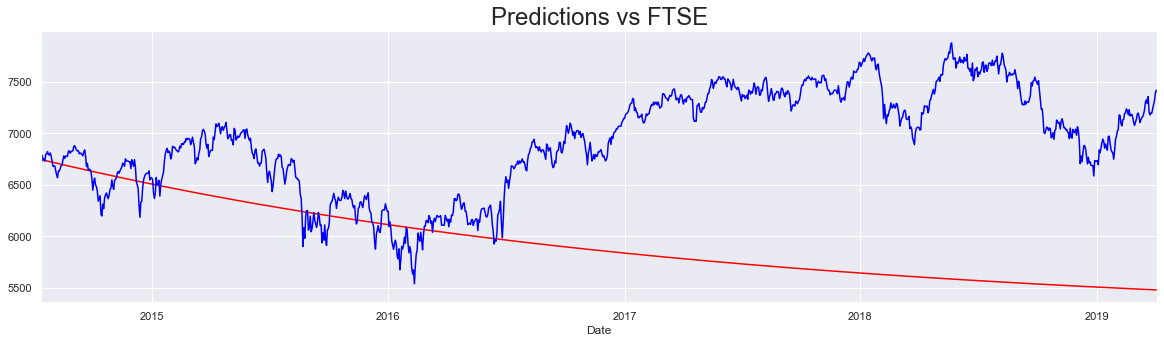

In [550]:
df_pred[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs FTSE",size=24)
plt.show()

In [551]:
### Trying the forecasting for dax
model_ar=ARIMA(df.dax, order=(1,0,0))
results_ar=model_ar.fit()

In [552]:
start_date="2014-07-15"
end_date="2015-01-01"

In [553]:
df_pred=results_ar.predict(start=start_date,end=end_date)

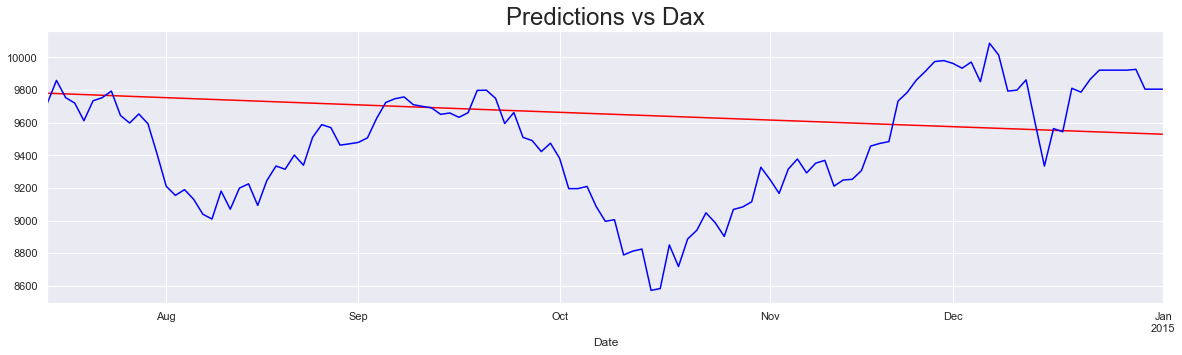

In [554]:
df_pred[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.dax[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Dax",size=24)
plt.show()

### Using Returns instead

In [555]:
model_ret_ar=ARIMA(df.ret_ftse[1:], order=(1,0,0))
results_ret_ar=model_ret_ar.fit()

In [556]:
df_pred_ar=results_ret_ar.predict(start=start_date,end=end_date)

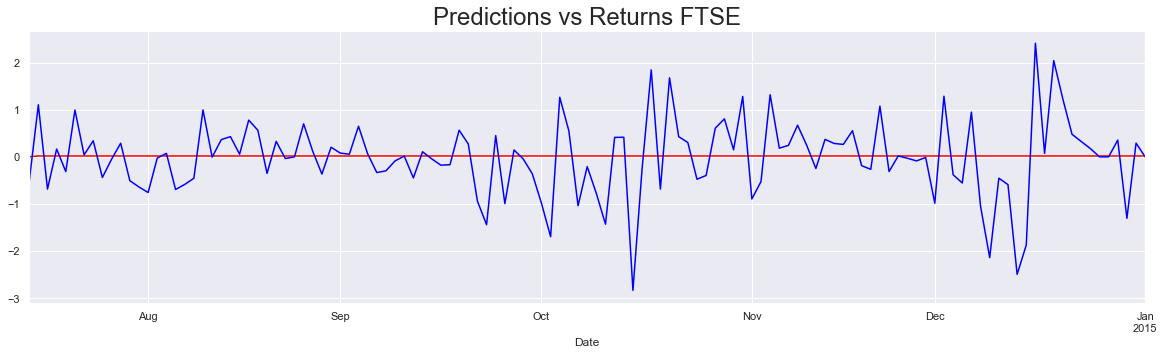

In [557]:
df_pred_ar[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Returns FTSE",size=24)
plt.show()

## MA

In [558]:
model_ret_ma=ARIMA(df.ret_ftse[1:],order=(0,0,1))
results_ret_ma=model_ret_ma.fit()

In [559]:
df_pred_ma=results_ret_ma.predict(start=start_date,end=end_date)

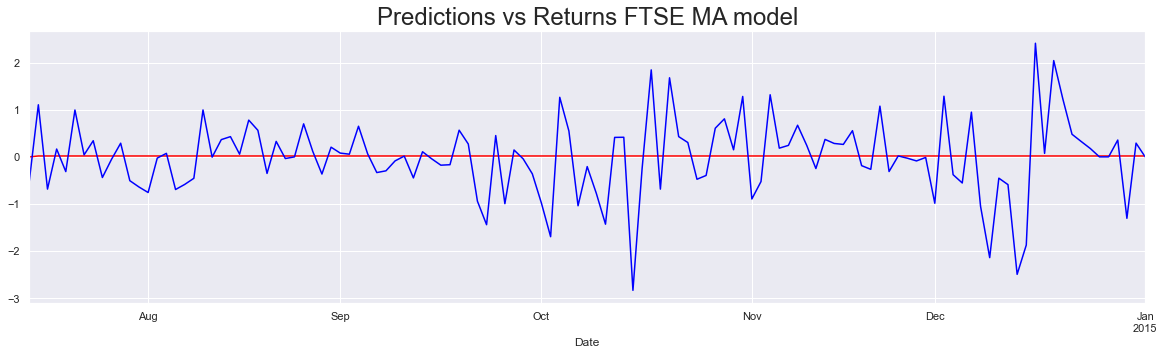

In [560]:
df_pred_ma[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Returns FTSE MA model", size=24)
plt.show()

In [561]:
df_pred_ma.head()

2014-07-15   -0.001259
2014-07-16    0.019173
2014-07-17    0.019173
2014-07-18    0.019173
2014-07-21    0.019173
Freq: B, Name: predicted_mean, dtype: float64

## ARMA

In [562]:
model_arma=ARIMA(df.ret_ftse[1:],order=(1,0,1))
results_arma=model_arma.fit()

In [563]:
df_pred_arma=results_arma.predict(start=start_date,end=end_date)

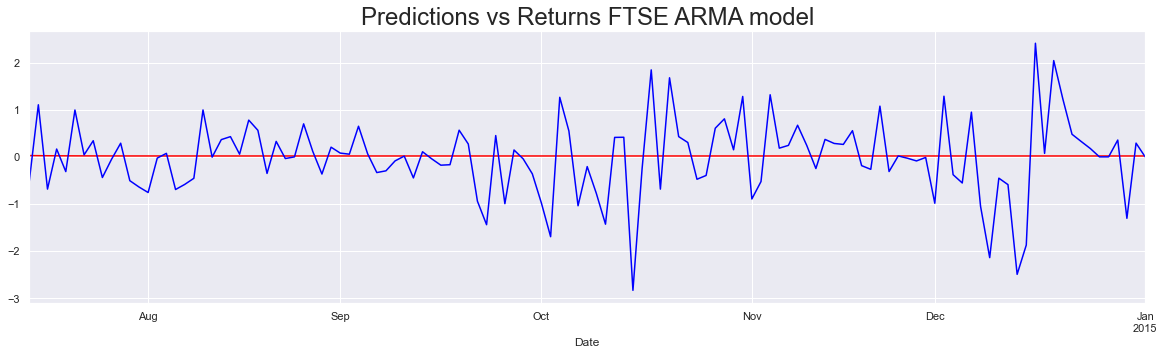

In [564]:
df_pred_arma[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Returns FTSE ARMA model",size=24)
plt.show()

In [565]:
df_pred_arma.size

123

In [566]:
df_pred_arma.tail()

2014-12-26    0.019214
2014-12-29    0.019214
2014-12-30    0.019214
2014-12-31    0.019214
2015-01-01    0.019214
Freq: B, Name: predicted_mean, dtype: float64

## ARMAX

In [567]:
start_date="2014-07-15"
end_date="2015-01-01"
model_ret_armax=ARIMA(df.ret_ftse[1:],exog=df[["ret_spx","ret_dax","ret_nikkei"]][1:],order=(1,0,1))
results_ret_armax=model_ret_armax.fit()

In [568]:
df_test[start_date:end_date]

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,-0.193210,-0.527714,-0.650103,0.642878,-16.906752,336.765641,-28900.695507,36.476013
2014-07-16,1981.569946,9859.269531,6784.700195,15379.299805,0.420108,1.105733,1.438970,-0.103022,36.761482,-705.634059,63970.243920,-5.845311
2014-07-17,1958.119995,9753.879883,6738.299805,15370.259766,-1.183403,-0.683897,-1.068940,-0.058781,-103.553334,436.435775,-47520.341116,-3.335130
2014-07-18,1978.219971,9720.019531,6749.500000,15215.709961,1.026494,0.166217,-0.347148,-1.005512,89.823046,-106.072947,-15432.645957,-57.051394
2014-07-21,1973.630005,9612.049805,6728.399902,15215.709961,-0.232025,-0.312617,-1.110797,0.000000,-20.303290,199.499693,-49381.149705,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-26,2088.770020,9922.110352,6609.899902,17818.960938,0.330957,0.000000,0.000000,0.057337,28.960344,-0.000000,0.000000,3.253203
2014-12-29,2090.570068,9927.129883,6633.500000,17729.839844,0.086177,0.357042,0.050589,-0.500148,7.540935,-227.849607,2248.979220,-28.377697


In [569]:
df_pred_armax=results_ret_armax.predict(start=start_date, end=end_date, exog=df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date])

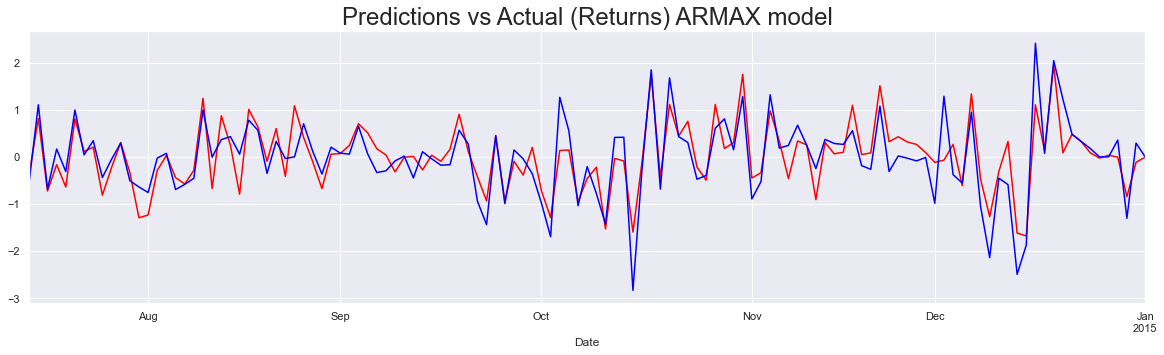

In [570]:
df_pred_armax[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns) ARMAX model",size=24)
plt.show()

## SARMA & SARIMAX

In [571]:
model_sarma=SARIMAX(df.ret_ftse[1:], order=(3,0,4), seasonal_order=(3,0,2,5))
results_sarma=model_sarma.fit()

In [572]:
df_pred_sarma=results_sarma.predict(start=start_date,end=end_date)

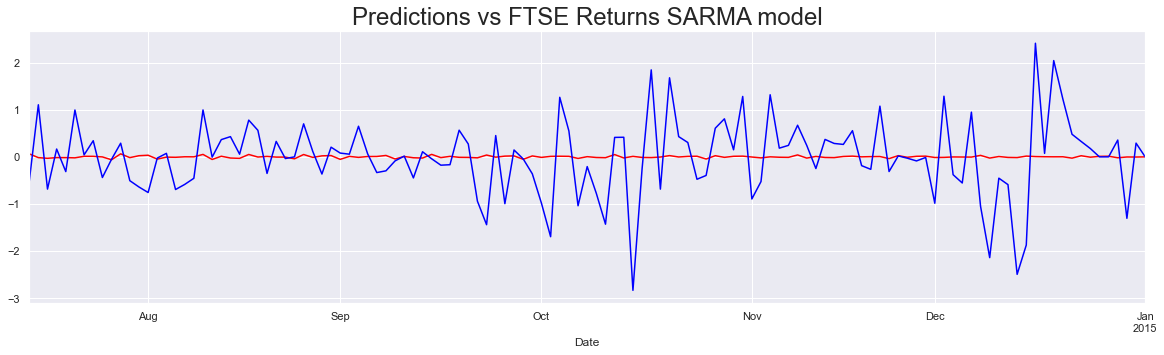

In [573]:
df_pred_sarma[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs FTSE Returns SARMA model", size=24)
plt.show()

### SARIMAX

In [574]:
model_sarimax=SARIMAX(df.ret_ftse[1:], exog= df[["ret_spx","ret_dax","ret_nikkei"]][1:], order=(3,0,4), seasonal_order=(3,0,2,5))
results_sarimax=model_sarimax.fit()

In [575]:
df_pred_sarimax=results_sarimax.predict(start=start_date,end=end_date,exog=df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date])

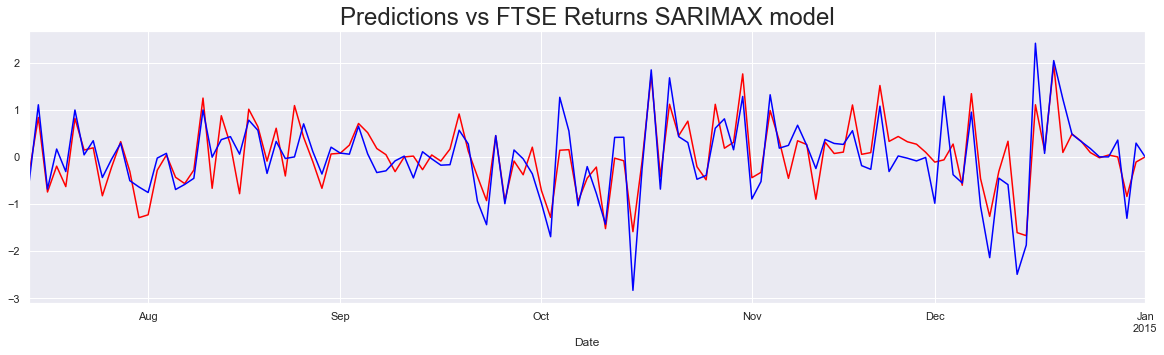

In [576]:
df_pred_sarimax[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs FTSE Returns SARIMAX model",size=24)
plt.show()

## Auto ARIMA

In [577]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [578]:
## Default best model
model_auto=auto_arima(df.ret_ftse[1:])

In [579]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5351
Model:               SARIMAX(1, 0, 3)   Log Likelihood               -8311.153
Date:                Fri, 03 Dec 2021   AIC                          16634.306
Time:                        08:14:58   BIC                          16673.816
Sample:                             0   HQIC                         16648.106
                               - 5351                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0282      0.021      1.341      0.180      -0.013       0.069
ar.L1         -0.4704      0.059     -7.923      0.000      -0.587      -0.354
ma.L1          0.4485      0.060      7.485      0.000       0.331       0.566
ma.L2         -0.0615      0.008     -7.316      0.000      -0.078      -0.045
ma.L3         -0.1136      0.008    -14.719      0.000      -0.129      -0.098
sigma2         1.3080      0.014     96.724      0.000       1.281       1.335
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7336.73
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [580]:
df_pred_auto=pd.DataFrame(model_auto.predict(n_periods=len(df_test[start_date:end_date])),
                         index=df_test[start_date:end_date].index)

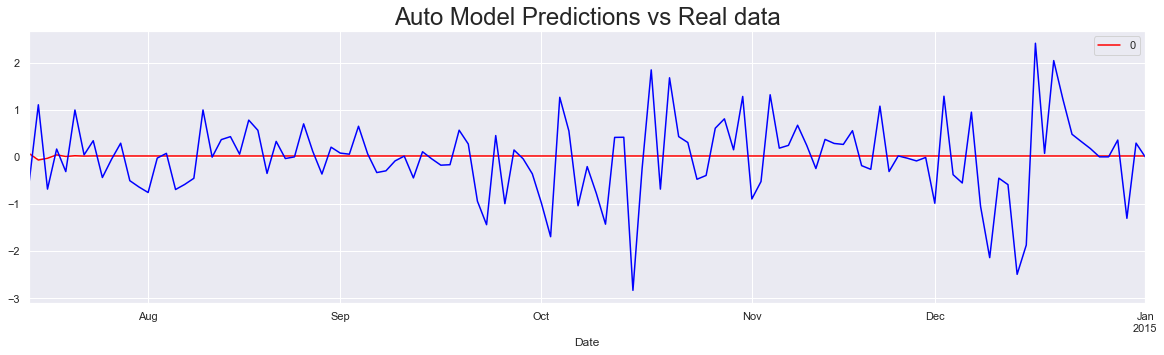

In [581]:
df_pred_auto[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Auto Model Predictions vs Real data",size=24)
plt.show()

In [582]:
## Auto ARIMA model with arguments
model_auto2=auto_arima(df.ret_ftse[1:], exogenous=df[["ret_spx","ret_dax","ret_nikkei"]][1:],
                           m=5, max_p=5, max_q=5, max_P=5, max_Q=5)

In [583]:
df_pred_auto2=pd.DataFrame(model_auto2.predict(n_periods = len(df_test[start_date:end_date]),
exogenous = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]),
index = df_test[start_date:end_date].index)

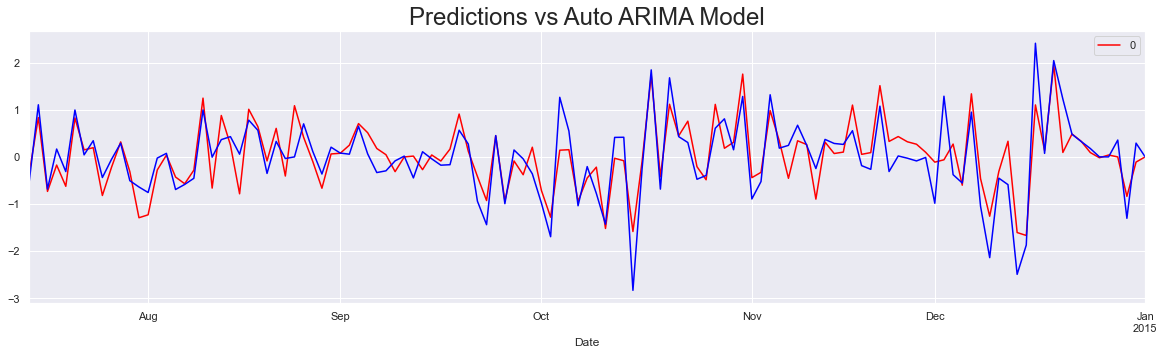

In [584]:
df_pred_auto2[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Auto ARIMA Model",size=24)
plt.show()

### Comparing all the Models(Returns)

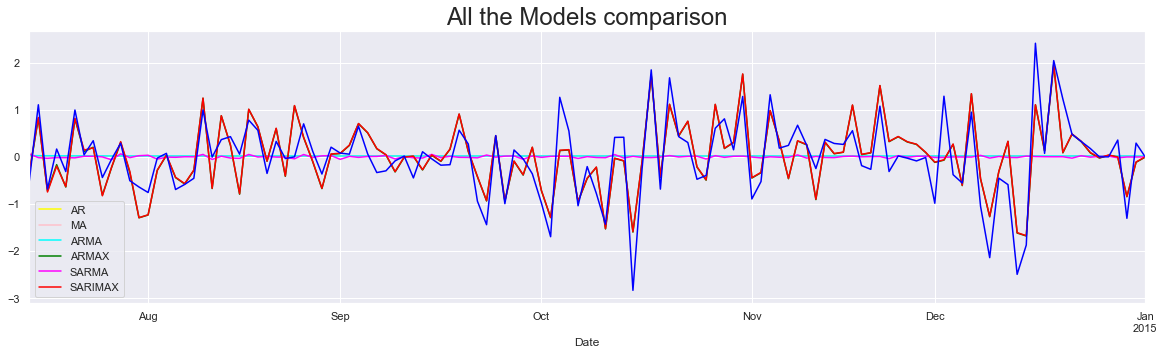

In [585]:
df_pred_ar[start_date:end_date].plot(figsize=(20,5),color="yellow")
df_pred_ma[start_date:end_date].plot(color="pink")
df_pred_arma[start_date:end_date].plot(color="cyan")
df_pred_armax[start_date:end_date].plot(color="green")
df_pred_sarma[start_date:end_date].plot(color="magenta")
df_pred_sarimax[start_date:end_date].plot(color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models comparison",size=24)
plt.show()

### Forecasting Volatility

In [586]:
model_garch=arch_model(df_comp.ret_ftse[1:], vol="GARCH", p=1, q=1, mean="constant", dist="Normal")
result_garch=model_garch.fit(last_obs=start_date, update_freq=10)

Iteration:     10,   Func. Count:     65,   Neg. LLF: 7310.5215327270835
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7310.521523672005
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


In [587]:
pred_garch=result_garch.forecast(horizon=1, align='target')

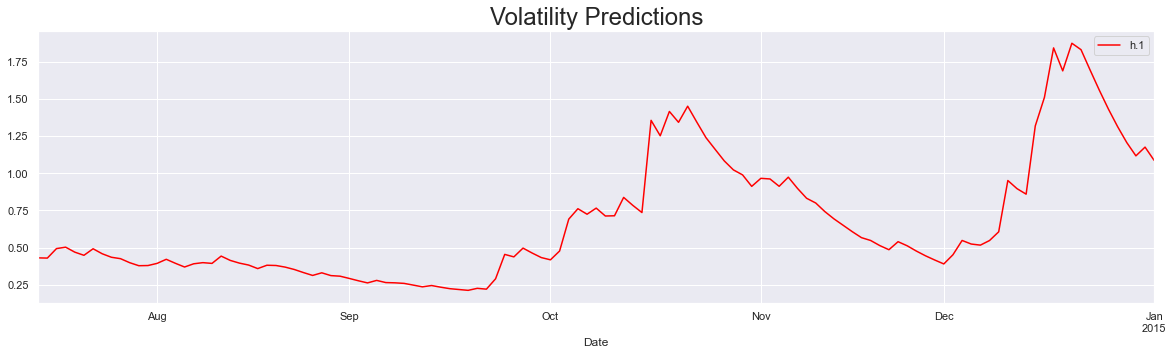

In [588]:
pred_garch.residual_variance[start_date:end_date].plot(figsize=(20,5),color="red")
plt.title("Volatility Predictions",size=24)
plt.show()

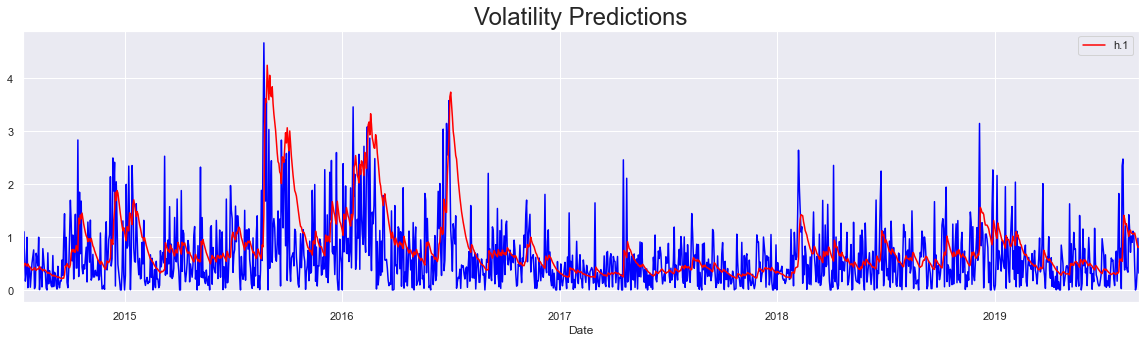

In [589]:
## more detail in the volatility graph
pred_garch.residual_variance[start_date:].plot(figsize=(20,5),color="red")
df_test.ret_ftse.abs().plot(color="blue",zorder=1)
plt.title("Volatility Predictions",size=24)
plt.show()

In [590]:
pred_garch=result_garch.forecast(horizon=100, align='target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-30,0.811058,0.805213,0.867109,0.940863,1.021424,1.086055,1.075133,1.068943,1.082501,1.092079,...,0.842724,0.844328,0.835815,0.821136,0.832658,0.844767,0.85596,0.869334,0.876818,0.891131


### Multivariate Regression Model

In [591]:
from statsmodels.tsa.api import VAR

In [592]:
df_ret=df[["ret_spx","ret_dax","ret_ftse","ret_nikkei"]][1:]

In [593]:
model_var_ret=VAR(df_ret)
model_var_ret.select_order(20)
results_var_ret=model_var_ret.fit(ic='aic')

In [594]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 03, Dec, 2021
Time:                     08:38:32
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.329002
Nobs:                     5346.00    HQIC:                  0.261684
Log likelihood:          -30861.5    FPE:                    1.25301
AIC:                     0.225548    Det(Omega_mle):         1.23351
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.039217         0.016160            2.427           0.015
L1.ret_spx           -0.110842         0.017560           -6.312           0.000
L1.ret_dax            0.064906         0.019025           

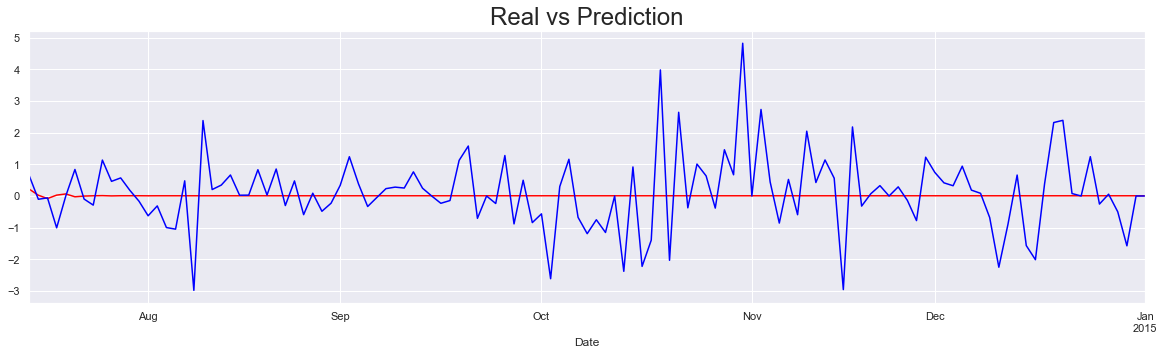

In [595]:
lag_order_ret=results_var_ret.k_ar
var_pred_ret=results_var_ret.forecast(df_ret.values[-lag_order_ret:],len(df_test[start_date:end_date]))

df_ret_pred=pd.DataFrame(data=var_pred_ret, index=df_test[start_date:end_date].index,
                        columns=df_test[start_date:end_date].columns[4:8])

df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize=(20,5),color="red")

df_test.ret_nikkei[start_date:end_date].plot(color="blue")
plt.title("Real vs Prediction",size=24)
plt.show()

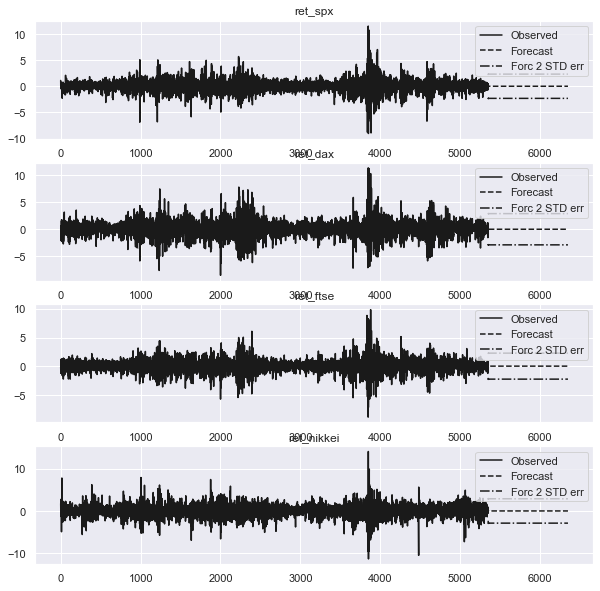

In [596]:
results_var_ret.plot_forecast(1000)
plt.show()

# Business Case

In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import statsmodels.api as sm
import sklearn
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")

### Importing the Data
* Data scraping from Yahoo Finance

In [598]:
raw_data=yfinance.download(tickers="VOW3.DE, PAH3.DE, BMW.DE", interval="1d", group_by='ticker',
                           auto_adjust=True, treads=True)

[*********************100%***********************]  3 of 3 completed


In [599]:
df=raw_data.copy()

### Defining the Key dates

In [638]:
# starting Date
start_date='2009-04-05'

# First Official Announcement - 49.9%
ann_1='2009-12-09'

# Second official Announcement - 50.1%
ann_2='2012-07-05'

# Ending date
end_date='2014-01-01'

# Dieselgate scandal
d_gate='2015-09-20'

### Pre-Processing the Data

In [601]:
# Extracting the closing prices
df['vol']=df['VOW3.DE'].Close
df['por']=df['PAH3.DE'].Close
df['bmw']=df['BMW.DE'].Close

# Creating Returns
df['ret_vol']=df['vol'].pct_change(1).mul(100)
df['ret_por']=df['por'].pct_change(1).mul(100)
df['ret_bmw']=df['bmw'].pct_change(1).mul(100)

# Creating the squared Returns
df['sq_ret_vol']=df.ret_vol.mul(df.ret_vol)
df['sq_ret_por']=df.ret_por.mul(df.ret_por)
df['sq_ret_bmw']=df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol']=df['VOW3.DE'].Volume
df['q_por']=df['PAH3.DE'].Volume
df['q_bmw']=df['BMW.DE'].Volume

In [602]:
## Assigning the Frequency and Filling NA Values
df=df.asfreq('b')
df=df.fillna(method='bfill')

In [603]:
## Removing surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

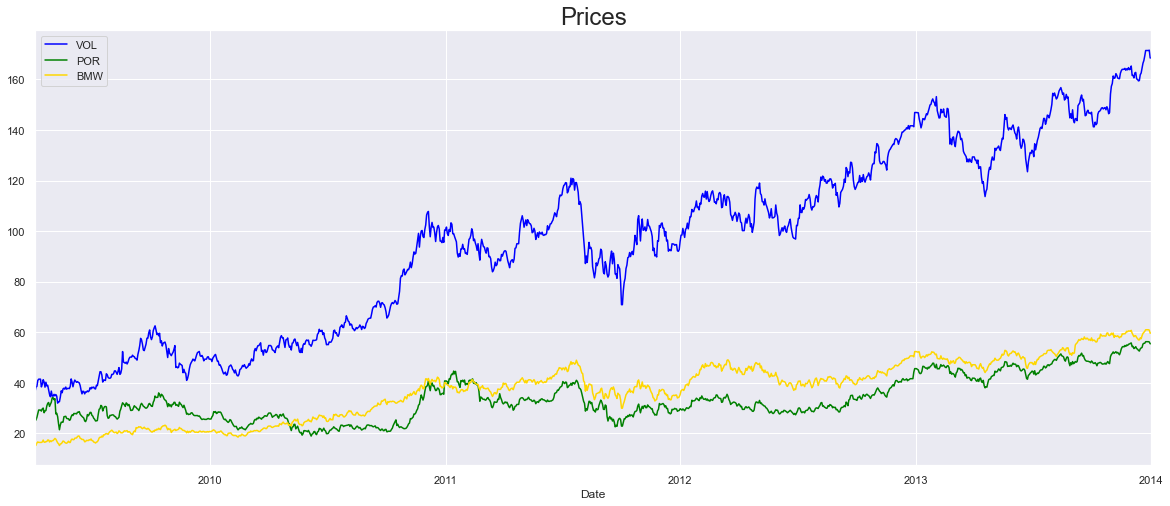

In [604]:
df['vol'][start_date:end_date].plot(figsize=(20,8),color="blue")
df['por'][start_date:end_date].plot(color="green")
df['bmw'][start_date:end_date].plot(color="gold")
plt.title("Prices",size=24)
plt.legend(["VOL","POR","BMW"])
plt.show()

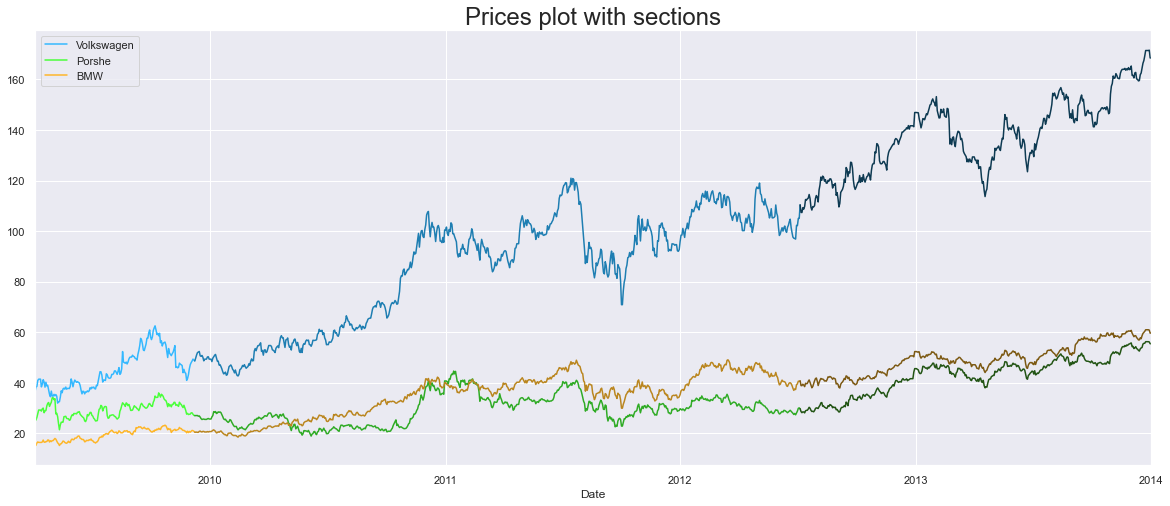

In [605]:
# Shades of Blue : color = "#33B8FF" color = "#49FF3A" color = "#FEB628"
df['vol'][start_date:ann_1].plot(figsize=(20,8), color="#33B8FF")
df['por'][start_date:ann_1].plot(color="#49FF3A")
df['bmw'][start_date:ann_1].plot(color="#FEB628")

# Shades of Green: #1E7EB2" "#2FAB25" "#BA861F"
df['vol'][ann_1:ann_2].plot(color="#1E7EB2")
df['por'][ann_1:ann_2].plot(color="#2FAB25")
df['bmw'][ann_1:ann_2].plot(color="#BA861F")

# Shades of Gold: "#0E3A52" "#225414" "#7C5913"
df['vol'][ann_2:end_date].plot(color="#0E3A52")
df['por'][ann_2:end_date].plot(color="#225414")
df['bmw'][ann_2:end_date].plot(color="#7C5913")
plt.title("Prices plot with sections", size=24)
plt.legend(["Volkswagen","Porshe","BMW"])
plt.show()

## Correlation

In [606]:
data_corr=df.loc[:,['vol','por','bmw']][start_date:end_date]
data_corr.corr()

,,vol,por,bmw
,,,,
vol,,1.000000,0.835955,0.979938
por,,0.835955,1.000000,0.805216
bmw,,0.979938,0.805216,1.000000


In [607]:
data_corr=df.loc[:,['vol','por','bmw']][start_date:ann_1]
data_corr.corr()

,,vol,por,bmw
,,,,
vol,,1.000000,0.663358,0.842761
por,,0.663358,1.000000,0.609504
bmw,,0.842761,0.609504,1.000000


In [608]:
data_corr=df.loc[:,['vol','por','bmw']][ann_1:ann_2]
data_corr.corr()

,,vol,por,bmw
,,,,
vol,,1.000000,0.742827,0.979594
por,,0.742827,1.000000,0.704272
bmw,,0.979594,0.704272,1.000000


In [609]:
data_corr=df.loc[:,['vol','por','bmw']][ann_2:end_date]
data_corr.corr()

,,vol,por,bmw
,,,,
vol,,1.000000,0.940524,0.928445
por,,0.940524,1.000000,0.949411
bmw,,0.928445,0.949411,1.000000


In [610]:
data_corr=df.loc[:,['vol','por','bmw']][end_date:]
data_corr.corr()

,,vol,por,bmw
,,,,
vol,,1.000000,0.946245,0.696153
por,,0.946245,1.000000,0.730537
bmw,,0.696153,0.730537,1.000000


## Best Fitting Models

### For Volkswagen

In [611]:
model_pre_vol=auto_arima(df.vol[start_date:ann_1], exogenous=df[["por","bmw"]][start_date:ann_1],
                    m=5, max_p=5, max_q=5)
model_bet_vol=auto_arima(df.vol[ann_1:ann_2], exogenous=df[["por","bmw"]][ann_1:ann_2],
                        m=5, max_p=5, max_q=5)
model_post_vol=auto_arima(df.vol[ann_2:end_date], exogenous=df[["por","bmw"]][ann_2:end_date],
                         m=5, max_p=5, max_q=5)

In [612]:
print(model_pre_vol.summary())
print(model_bet_vol.summary())
print(model_post_vol.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -322.988
Date:                Fri, 03 Dec 2021   AIC                            655.976
Time:                        08:39:13   BIC                            671.885
Sample:                    04-06-2009   HQIC                           662.427
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7232      0.447      1.618      0.106      -0.153       1.599
por            0.4000      0.096      4.168      0.000       0.212       0.588
bmw            0.6919      0.328      2.107      0.0

### For Porsche

In [613]:
model_pre_por=auto_arima(df.por[start_date:ann_1], exogenous=df[["vol","bmw"]][start_date:ann_1],
                        m=5, max_p=5, max_q=5)
model_bet_por=auto_arima(df.por[ann_1:ann_2], exogenous=df[["vol","bmw"]][ann_1:ann_2],
                        m=5, max_p=5, max_q=5)
model_post_por=auto_arima(df.por[ann_2:end_date], exogenous=df[["vol","bmw"]][ann_2:end_date],
                         m=5, max_p=5, max_q=5)

In [633]:
print(model_pre_por.summary())
print(model_bet_por.summary())
print(model_post_por.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -225.801
Date:                Fri, 03 Dec 2021   AIC                            463.601
Time:                        09:22:20   BIC                            482.692
Sample:                    04-06-2009   HQIC                           471.343
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5755      0.375      1.533      0.125      -0.160       1.311
vol            0.1150      0.053      2.157      0.031       0.011       0.219
bmw            0.8819      0.159      5.558      0.0

## Predictions for the Future

In [634]:
model_auto_pred_pr=auto_arima(df.vol[start_date:ann_1], m=5, max_q=5, max_p=5, max_P=5, max_Q=5, trend='ct')

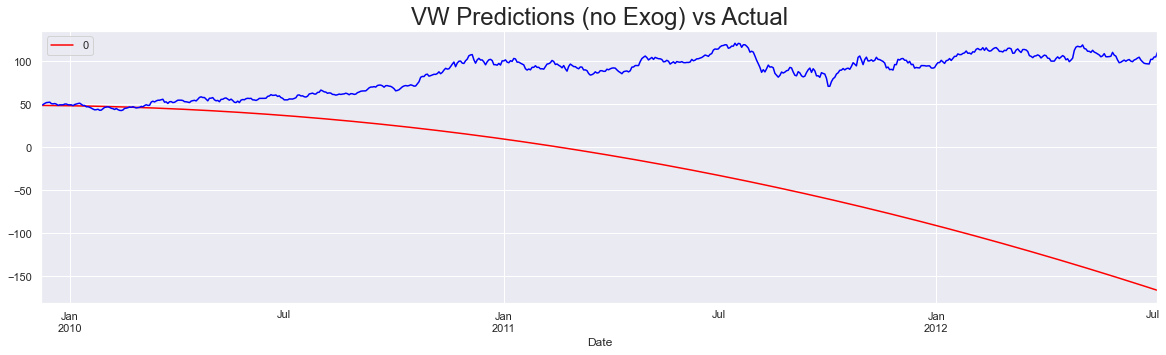

In [635]:
df_auto_pred_pr=pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2])), index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5), color="red")

df.vol[ann_1:ann_2].plot(color="blue")
plt.title("VW Predictions (no Exog) vs Actual",size=24)
plt.show()

### For Volkswagen

In [654]:
model_auto_pred_exog=auto_arima(df.vol[start_date:ann_1], exogenous=df[['por']][start_date:ann_1], m=5, max_q=5, max_p=5, max_P=5, max_Q=5, trend='ct')
df_auto_pred_exog=pd.DataFrame(model_auto_pred_exog.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['por']][ann_1:ann_2]), index=df[ann_1:ann_2].index)

In [655]:
df_auto_pred_exog

,0
Date,
2009-12-09,48.705641
2009-12-10,48.745579
2009-12-11,48.807153
2009-12-14,48.821260
2009-12-15,48.706248
...,...
2012-06-29,-6.146030
2012-07-02,-5.941301
2012-07-03,-5.556360


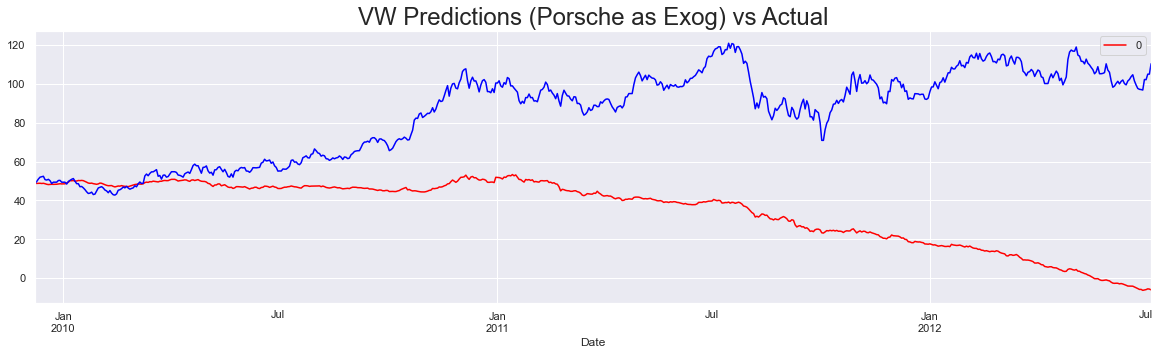

In [656]:
df_auto_pred_exog[ann_1:ann_2].plot(figsize=(20,5), color="red")
df.vol[ann_1:ann_2].plot(color="blue")
plt.title("VW Predictions (Porsche as Exog) vs Actual",size=24)
plt.show()

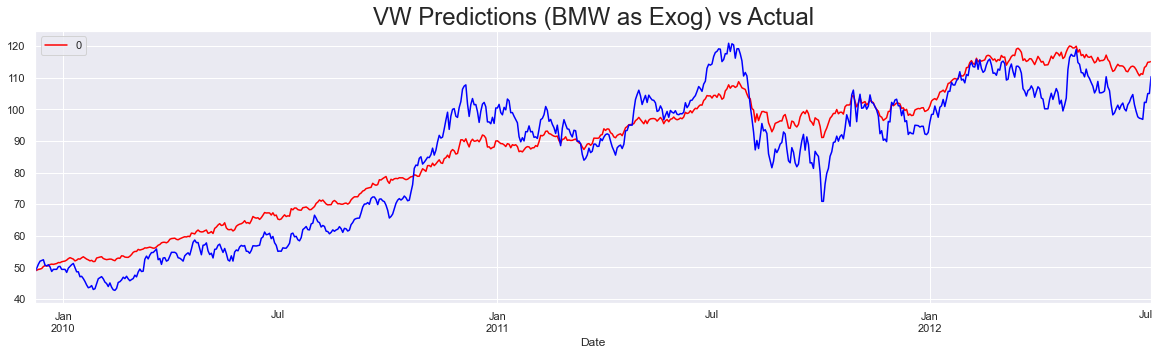

In [657]:
model_auto_pred_exog=auto_arima(df.vol[start_date:ann_1], exogenous=df[['bmw']][start_date:ann_1], m=5, max_q=5, max_p=5, max_P=5, max_Q=5, trend='ct')
df_auto_pred_exog=pd.DataFrame(model_auto_pred_exog.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['bmw']][ann_1:ann_2]), index=df[ann_1:ann_2].index)

df_auto_pred_exog[ann_1:ann_2].plot(figsize=(20,5), color="red")
df.vol[ann_1:ann_2].plot(color="blue")
plt.title("VW Predictions (BMW as Exog) vs Actual",size=24)
plt.show()

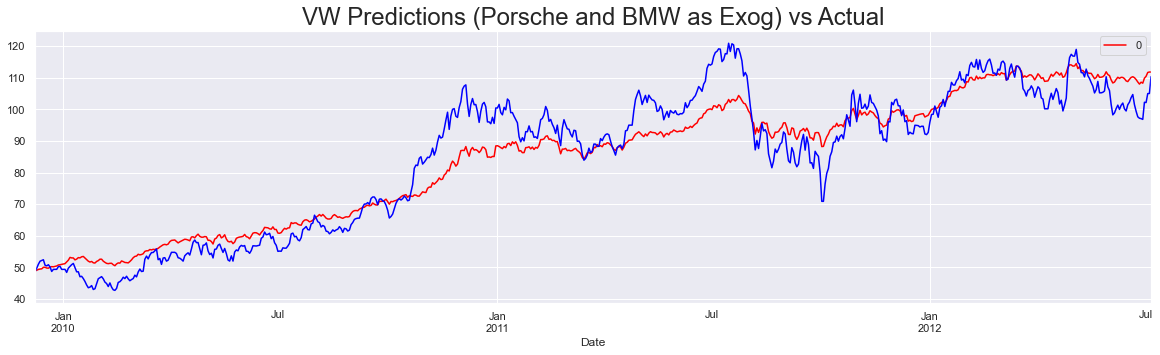

In [659]:
model_auto_pred_exog=auto_arima(df.vol[start_date:ann_1], exogenous=df[['por','bmw']][start_date:ann_1], m=5, max_q=5, max_p=5, max_P=5, max_Q=5, trend='ct')
df_auto_pred_exog=pd.DataFrame(model_auto_pred_exog.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['por','bmw']][ann_1:ann_2]), index=df[ann_1:ann_2].index)

df_auto_pred_exog[ann_1:ann_2].plot(figsize=(20,5), color="red")
df.vol[ann_1:ann_2].plot(color="blue")
plt.title("VW Predictions (Porsche and BMW as Exog) vs Actual",size=24)
plt.show()

## Volatility

### Volatility of VW for Each period

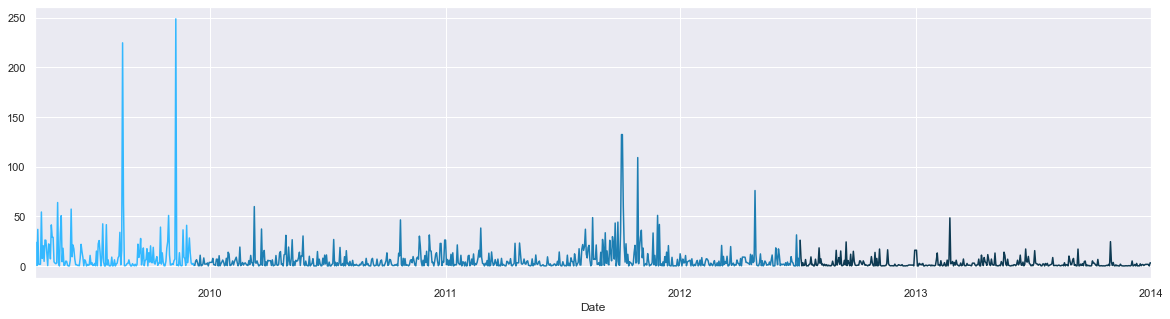

In [661]:
df['sq_ret_vol'][start_date:ann_1].plot(figsize=(20,5),color="#33B8FF")
df['sq_ret_vol'][ann_1:ann_2].plot(color="#1E7EB2")
df['sq_ret_vol'][ann_2:end_date].plot(color="#0E3A52")
plt.show()

### Volatility Trends for Each period

In [663]:
model_garch_pre=arch_model(df.ret_vol[start_date:ann_1],mean='Constant', vol="GARCH", p=1,q=1)
results_garch_pre=model_garch_pre.fit(update_freq=5)
model_garch_bet=arch_model(df.ret_vol[ann_1:ann_2], mean='Constant', vol="GARCH", p=1, q=1)
results_garch_bet=model_garch_bet.fit(update_freq=5)
model_garch_post=arch_model(df.ret_vol[ann_2:end_date], mean='Constant', vol="GARCH", p=1,q=1)
results_garch_post=model_garch_post.fit(update_freq=5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.7775470647962
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.0031745238144
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.9905219296932
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.99052187740244
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.753355945035
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7314246620099
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7314246607648
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     34,   Neg. LLF: 724.5621257731209
Optimization terminated successfully    (Exit mode 0)
            Current function value: 724.5577884122323
            Iterations: 7
            F

In [664]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.991
Distribution:                  Normal   AIC:                           957.981
Method:            Maximum Likelihood   BIC:                           970.708
                                        No. Observations:                  178
Date:                Fri, Dec 03 2021   Df Residuals:                      177
Time:                        09:55:04   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1570      0.266      0.589      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6196      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.195e-02      1.675  9.400e-02 [-2.623e-02,  0.334]
beta[1]        0.0000      0.349      0.000      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [665]:
results_garch_bet.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Fri, Dec 03 2021   Df Residuals:                      671
Time:                        09:55:04   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [666]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Fri, Dec 03 2021   Df Residuals:                      389
Time:                        09:55:04   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.554,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""